# Molecular class --> Superclass map is now in 

In [6]:
import json

import seaborn as sns
import pandas as pd

In [7]:
ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')

## Vanessa's LipidGenie Lipid Superclass Color Scheme 
- purple = glycerolipid = TG, DG, alk-DG
- red = fatty acyl
- gray = unidentified
- blue = sterol lipid
- yellow = sphingolipid
- green = phospholipid

# Color palette ideas:


In [84]:
sns.color_palette('cubehelix', 6)

[(0.10231025194333628, 0.13952898866828906, 0.2560120319409181),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.4106130272672762, 0.48044780541672255, 0.1891154277778484),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.7775608374378459, 0.8840392521212448, 0.9452007992345052)]

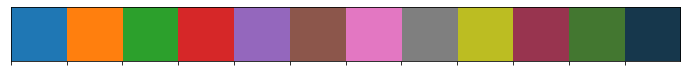

In [79]:
# # 0 = Blue         Sterol lipid
# 1 = Orange       Sphingolipid
# 2 = Green        Phospholipid
# 3 = Red          FA
# 4 = Purple       Glycerolipid
# 5 = Brown        Carboxylic Acid
# 6 = Pink         Amino Acid
# 7 = Gray         Unidentified
# 8 = Olive green  Amine/Amide/Ammonium/N-heterocycle
# 9 = Maroon-ish   Other Metabolite

p = sns.color_palette(n_colors=9)
p.append(sns.color_palette('twilight_r', n_colors=15)[4])  # Add maroon
p.append(sns.color_palette('cubehelix', 15)[5])
p.append(sns.color_palette('cubehelix', 15)[2])
sns.palplot(p)
lipid_class_colormap = {
    # LIPID SUPERCLASSES
    'Glycerolipid': p[4],
    'Sterol Lipid': p[0],
    'Sphingolipid': p[1],
    'Phospholipid': p[2],
    'Fatty Acyl'  : p[3],
    # LIPIDS
    "TG"          : p[4],
    "Alkenyl-DG"  : p[4],
    "AC"          : p[3],
    "FA"          : p[3],
    "CE"          : p[0],
    "SM"          : p[1],
    "Cer[NS]"     : p[1],
    "LysoPE"      : p[2],
    "LysoPC"      : p[2],
    "PC"          : p[2],
    "PI"          : p[2],
    "Plasmenyl-PC": p[2],
    "Plasmanyl-PC": p[2],
    "Plasmenyl-PE": p[2],
    "PE"          : p[2],
    "Plasmanyl-PE": p[2],
    
    # ALL UNKNOWNS MAP TO GRAY
    'Unidentified': p[7],
}

# superclass_colormap = {}
# for subdict in lipid_class_colormap.values():
#     superclass = subdict['superclass']
#     superclass_colormap[superclass] = subdict['color']
# display('superclass_colormap: ', superclass_colormap)

# print(" ".join([superclass[:6] for superclass in superclass_colormap]))

# lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})

# Write class_colormap to file 
# with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'w') as outfile:
#     json.dump(class_colormap, outfile)

## Metabolites color scheme

array(['Unidentified', 'Nitrogen heterocycle', 'Amino acid',
       'Organic acid', 'Carbohydrate', 'Amino acid derivative', 'Alcohol'],
      dtype=object)

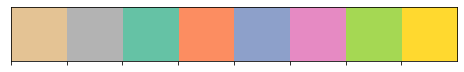

In [86]:
display(data.loc[data['Type'] == 'metabolite', 'molec_class'].unique())




# Another option for colormap 
# metabolite_class_colormap = {
#     "Nitrogen heterocycle" : p[10],
#     "Amino acid"           : p[6],
#     "Organic acid"         : p[5],
#     "Carbohydrate"         : p[8],
#     "Amino acid derivative": p[9],
#     "Alcohol"              : p[11],
# }
# sns.palplot(metabolite_class_colormap.values())

# The 'Set2' color palette is quite muted compared to the lipid superclasses
metab_colors = sns.color_palette('Set2', 14, desat=1)[6:]
sns.palplot(metab_colors)
metabolite_class_colormap = {
    "Nitrogen heterocycle" : metab_colors[2],
    "Amino acid"           : metab_colors[3],
    "Organic acid"         : metab_colors[0],
    "Carbohydrate"         : metab_colors[4],
    "Amino acid derivative": metab_colors[5],
    "Alcohol"              : metab_colors[6],
}

# metabolite_class_colormap = {
#     "nitrogen heterocycle"  : {'color': metab_colors[2], 'superclass': 'nitrogen heterocycle'},
#     "amino acid"            : {'color': metab_colors[3], 'superclass': 'amino acid'},
#     "organic acid"          : {'color': metab_colors[0], 'superclass': 'organic acid'},
#     "carbohydrate"          : {'color': metab_colors[4], 'superclass': 'carbohydrate'},
#     "amino acid derivative" : {'color': metab_colors[5], 'superclass': 'amino acid derivative'},
#     "alcohol"               : {'color': metab_colors[1], 'superclass': 'alcohol'},  
# }

# metabolite_superclass_colormap = {x: metabolite_class_colormap[x]['color'] for x in metabolite_class_colormap}

In [87]:
lm_pal = sns.color_palette('Set2', n_colors=2)
# lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})
print('LIPID   METAB')
display(lm_pal)
lipid_metab_colormap = {'lipid': lm_pal[0], 
                        'metabolite': lm_pal[1]}

# print('  RBG   FBG  IMPAIR DIAB.  NORMAL')
display(sns.color_palette('colorblind', 10))
blindcolor = sns.color_palette('colorblind', 10)
rbg_color = blindcolor[0]
fbg_color = blindcolor[1]
normal_color = blindcolor[2]
impaired_color = blindcolor[4]
diabetic_color = blindcolor[3]

metadata_colormap = {'FBG':      fbg_color,
                     'RBG':      rbg_color,
                     'normal':   normal_color,
                     'impaired': impaired_color,
                     'diabetic': diabetic_color}

LIPID   METAB


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Color Nile rats by OGTT glucose rank using a uniform perception color map (e.g. viridis)

In [88]:
cmap = sns.color_palette('viridis', 10)  # twilight_shifted  coolwarm
display(cmap)

ogtt_rank = ap.loc[ap['lcms_sampled'], 'OGTT (AUC)'].sort_values().index

d1 = {str(animal):   color for animal, color in zip(ogtt_rank, cmap)}
d2 = {float(animal): color for animal, color in zip(ogtt_rank, cmap)}
animal_colormap = {**d1, **d2}   # Make string and float version of animal numbers for redundancy
# animal_colormap

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

# combine all color maps and save to json file

In [89]:
combined_colormaps = {
    **lipid_metab_colormap, 
    **lipid_class_colormap,
    **metabolite_class_colormap,
    **metadata_colormap, 
    **superclass_colormap, 
    **animal_colormap,
#     **class_colormap,
#     'all_superclass_colors': {**superclass_colormap, **metabolite_superclass_colormap},
}
# display(combined_colormaps)

with open(r'..\data\metadata\color_schemes.json', 'w') as outfile:
    json.dump(combined_colormaps, outfile, indent=2)

In [71]:
# class_to_superclass_map = {key: val[-1] for key, val in class_colormap.items(),}
# display(class_to_superclass_map)

# with open(r'..\data\metadata\class_to_superclass_map.json', 'w') as outfile:
#     json.dump(class_to_superclass_map, outfile, indent=2)

## Assigning a unique color to each Rat is also possible, but not really important

In [74]:
# animal_colors = sns.color_palette('tab10')
# animal_colormap = {animal: color for animal, color in zip([1091,1093,
#                                                            1060,1062,1074,1092,1102,
#                                                            1076,1082,1101], animal_colors)}
# # for animal in animal_colormap:
# print(" ", "   ".join([str(animal) for animal in animal_colormap]))
# sns.palplot([color for color in animal_colormap.values()])

## Make a color scheme for the 4 litters the Nile rats were born in 

In [75]:
# # Grey/brown/violet/blue
# litter_colors = sns.palplot(sns.color_palette('Accent_r', 9))
# # sns.palplot(litter_colors)
# # litter_colormap = {litter_number: color for litter_number, color in zip(range(4), litter_colors[:4])}

# # Greys 
# litter_colors = pd.Series(sns.color_palette('Greys', 5))
# litter_colormap = {litter_number: color for litter_number, color in zip([0,1,2,3], litter_colors.loc[1:])}
# sns.palplot(litter_colormap.values())

# Playing with color schemes

## Color scheme from Bang Wong (Nature Methods, 2011) 

https://www.nature.com/articles/nmeth.1618

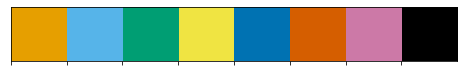

In [77]:
cb = [[230, 159, 0], # orange
      [86, 180, 233], # skyblue
      [0, 158, 115], # Blueish Green
      [240, 228, 66],# Yellow
      [0, 114, 178], # Blue
      [213, 94, 0],  # Vermillion
      [204, 121, 167], # Reddish purple
      [0,0,0]] # Black
for i, c in enumerate(cb): 
    for j, h in enumerate(c):
        cb[i][j] = h/255
sns.palplot(cb)

In [78]:
pals = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
        'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
        'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
        'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
        'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
        'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
        'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
        'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
        'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
        'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
        'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag',
        'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
        'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
        'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
        'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno',
        'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
        'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
        'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
        'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
        'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
        'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
for pal in pals:
    try:
        print(pal)
        display(sns.color_palette(pal, n_colors=10))
    except ValueError:
        pass

Accent


[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4),
 (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079)]

Accent_r


[(0.4, 0.4, 0.4),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (1.0, 1.0, 0.6),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.4980392156862745, 0.788235294117647, 0.4980392156862745)]

Blues


[(0.8978854286812764, 0.939038831218762, 0.977362552864283),
 (0.828881199538639, 0.8937639369473279, 0.954725105728566),
 (0.7506343713956171, 0.8478431372549019, 0.9282122260668974),
 (0.6325259515570935, 0.7976470588235294, 0.8868742791234141),
 (0.491764705882353, 0.7219684736639754, 0.8547789311803152),
 (0.36159938485198, 0.6427374086889658, 0.8165782391387928),
 (0.24816608996539793, 0.5618915801614763, 0.7709803921568628),
 (0.15072664359861593, 0.4644521337946943, 0.7207843137254902),
 (0.07481737793156479, 0.3732564398308343, 0.6552095347943099),
 (0.03137254901960784, 0.28161476355247983, 0.5582622068435218)]

Blues_r


[(0.03137254901960784, 0.28161476355247983, 0.5582622068435218),
 (0.07481737793156479, 0.3732564398308343, 0.6552095347943099),
 (0.15072664359861593, 0.4644521337946943, 0.7207843137254902),
 (0.24816608996539796, 0.5618915801614763, 0.7709803921568628),
 (0.36159938485198, 0.6427374086889658, 0.8165782391387928),
 (0.49176470588235294, 0.7219684736639754, 0.8547789311803152),
 (0.6325259515570935, 0.7976470588235294, 0.8868742791234141),
 (0.7506343713956171, 0.8478431372549019, 0.9282122260668974),
 (0.828881199538639, 0.8937639369473279, 0.954725105728566),
 (0.8978854286812764, 0.939038831218762, 0.977362552864283)]

BrBG


[(0.5274894271434064, 0.304959630911188, 0.03729334871203383),
 (0.7098039215686275, 0.46897347174163784, 0.14955786236063054),
 (0.8376009227220299, 0.6858131487889272, 0.39792387543252583),
 (0.9328719723183391, 0.8572087658592848, 0.6678200692041522),
 (0.9625528642829682, 0.9377931564782775, 0.8723567858515955),
 (0.8794309880815072, 0.9413302575932334, 0.932487504805844),
 (0.6821222606689737, 0.8775086505190313, 0.8482122260668975),
 (0.415455594002307, 0.7416378316032297, 0.6991926182237602),
 (0.16785851595540177, 0.554479046520569, 0.5231064975009612),
 (0.003537101114955786, 0.3838523644752019, 0.35094194540561324)]

BrBG_r


[(0.003537101114955787, 0.3838523644752019, 0.3509419454056133),
 (0.16785851595540185, 0.5544790465205691, 0.5231064975009613),
 (0.41545559400230697, 0.7416378316032297, 0.6991926182237602),
 (0.6821222606689737, 0.8775086505190313, 0.8482122260668975),
 (0.8794309880815072, 0.9413302575932334, 0.932487504805844),
 (0.9625528642829682, 0.9377931564782775, 0.8723567858515955),
 (0.9328719723183391, 0.8572087658592848, 0.6678200692041522),
 (0.83760092272203, 0.6858131487889273, 0.39792387543252594),
 (0.7098039215686275, 0.46897347174163784, 0.14955786236063054),
 (0.5274894271434064, 0.304959630911188, 0.03729334871203383)]

BuGn


[(0.9176931949250289, 0.9684275278738947, 0.9808381391772395),
 (0.8545943867743176, 0.9451441753171858, 0.9434525182622069),
 (0.7670588235294118, 0.9125720876585929, 0.8832295271049596),
 (0.6164705882352941, 0.8535178777393311, 0.79760092272203),
 (0.47215686274509805, 0.7919108035371011, 0.6954863514033065),
 (0.34765090349865435, 0.7324875048058439, 0.5780545943867743),
 (0.2452133794694348, 0.6710495963091119, 0.4469204152249135),
 (0.1566320645905421, 0.5677047289504037, 0.302237600922722),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.0, 0.38268358323721646, 0.15398692810457515)]

BuGn_r


[(0.0, 0.3826835832372164, 0.15398692810457515),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.1566320645905421, 0.5677047289504037, 0.302237600922722),
 (0.24521337946943483, 0.6710495963091119, 0.4469204152249135),
 (0.34765090349865435, 0.7324875048058439, 0.5780545943867743),
 (0.47215686274509805, 0.7919108035371011, 0.6954863514033064),
 (0.6164705882352941, 0.853517877739331, 0.79760092272203),
 (0.7670588235294118, 0.9125720876585929, 0.8832295271049596),
 (0.8545943867743176, 0.9451441753171858, 0.9434525182622069),
 (0.9176931949250289, 0.9684275278738946, 0.9808381391772395)]

BuPu


[(0.9035447904652056, 0.942960399846213, 0.9666897347174164),
 (0.8210841983852365, 0.8820453671664744, 0.9325336409073434),
 (0.7277047289504037, 0.8125951557093425, 0.8942099192618224),
 (0.6302652825836217, 0.7446828143021915, 0.8587773933102653),
 (0.574486735870819, 0.641999231064975, 0.8047673971549404),
 (0.5490196078431373, 0.5273971549404075, 0.7467589388696655),
 (0.5477277970011535, 0.40604382929642446, 0.6876585928489043),
 (0.5359169550173011, 0.2820299884659746, 0.6286043829296425),
 (0.5180469050365244, 0.14571318723567858, 0.5436216839677047),
 (0.4491041906958862, 0.04244521337946944, 0.43277201076509036)]

BuPu_r


[(0.44910419069588614, 0.04244521337946944, 0.4327720107650903),
 (0.5180469050365244, 0.14571318723567858, 0.5436216839677047),
 (0.5359169550173011, 0.2820299884659746, 0.6286043829296425),
 (0.5477277970011535, 0.40604382929642446, 0.6876585928489043),
 (0.5490196078431373, 0.5273971549404075, 0.7467589388696655),
 (0.574486735870819, 0.641999231064975, 0.8047673971549404),
 (0.6302652825836217, 0.7446828143021915, 0.8587773933102653),
 (0.7277047289504037, 0.8125951557093425, 0.8942099192618224),
 (0.8210841983852364, 0.8820453671664744, 0.9325336409073434),
 (0.9035447904652056, 0.942960399846213, 0.9666897347174164)]

CMRmap


[(0.10823529411764705, 0.10823529411764705, 0.3607843137254902),
 (0.2164705882352941, 0.15, 0.6107843137254902),
 (0.3494117647058823, 0.15823529411764706, 0.7088235294117647),
 (0.5752941176470587, 0.19588235294117648, 0.5205882352941177),
 (0.855686274509804, 0.2319607843137255, 0.2762745098039216),
 (0.9639215686274509, 0.34019607843137256, 0.09588235294117647),
 (0.9, 0.5205882352941177, 0.00823529411764706),
 (0.9, 0.7088235294117647, 0.0835294117647059),
 (0.9, 0.8335294117647059, 0.3227450980392157),
 (0.927843137254902, 0.927843137254902, 0.6392156862745098)]

CMRmap_r


[(0.927843137254902, 0.927843137254902, 0.6392156862745098),
 (0.9, 0.8335294117647059, 0.3227450980392157),
 (0.9, 0.7088235294117647, 0.08352941176470588),
 (0.9, 0.5205882352941177, 0.008235294117647063),
 (0.9639215686274509, 0.34019607843137256, 0.09588235294117646),
 (0.855686274509804, 0.2319607843137255, 0.27627450980392154),
 (0.5752941176470588, 0.19588235294117648, 0.5205882352941177),
 (0.3494117647058823, 0.15823529411764706, 0.7088235294117647),
 (0.2164705882352941, 0.15, 0.6107843137254902),
 (0.10823529411764705, 0.10823529411764705, 0.3607843137254902)]

Dark2


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196)]

Dark2_r


[(0.4, 0.4, 0.4),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667)]

GnBu


[(0.9035447904652056, 0.9627681660899654, 0.881753171856978),
 (0.8436755094194541, 0.939038831218762, 0.8205920799692425),
 (0.7767474048442907, 0.9125259515570934, 0.7622145328719724),
 (0.6704498269896194, 0.8711880046136101, 0.7149711649365629),
 (0.5460207612456748, 0.8240522875816993, 0.7474048442906575),
 (0.41868512110726647, 0.7646289888504422, 0.7898500576701268),
 (0.29457900807381776, 0.6893656286043829, 0.8206689734717416),
 (0.19123414071510958, 0.5742099192618224, 0.7586620530565167),
 (0.09219530949634756, 0.47040369088811995, 0.7057900807381776),
 (0.03137254901960784, 0.36416762783544787, 0.6275586312956556)]

GnBu_r


[(0.03137254901960784, 0.36416762783544787, 0.6275586312956556),
 (0.09219530949634756, 0.47040369088811995, 0.7057900807381776),
 (0.19123414071510958, 0.5742099192618224, 0.7586620530565167),
 (0.29457900807381776, 0.6893656286043829, 0.8206689734717416),
 (0.4186851211072664, 0.7646289888504422, 0.7898500576701268),
 (0.5460207612456748, 0.8240522875816993, 0.7474048442906575),
 (0.6704498269896194, 0.8711880046136101, 0.7149711649365629),
 (0.7767474048442907, 0.9125259515570934, 0.7622145328719724),
 (0.8436755094194541, 0.939038831218762, 0.8205920799692425),
 (0.9035447904652056, 0.9627681660899654, 0.881753171856978)]

Greens


[(0.9176931949250289, 0.9684275278738947, 0.901361014994233),
 (0.8459054209919262, 0.9399307958477509, 0.8228219915417148),
 (0.7558477508650518, 0.9033910034602076, 0.7290426758938869),
 (0.6436447520184544, 0.8561476355247981, 0.6197923875432525),
 (0.5185697808535179, 0.7983391003460207, 0.5150941945405614),
 (0.3827450980392157, 0.7332564398308343, 0.42737408688965783),
 (0.2452133794694348, 0.6602537485582468, 0.35695501730103807),
 (0.1566320645905421, 0.5657670126874279, 0.28608996539792386),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.0, 0.38268358323721646, 0.15398692810457515)]

Greens_r


[(0.0, 0.3826835832372164, 0.15398692810457515),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.1566320645905421, 0.5657670126874279, 0.28608996539792386),
 (0.24521337946943483, 0.6602537485582468, 0.35695501730103807),
 (0.38274509803921564, 0.7332564398308343, 0.42737408688965783),
 (0.5185697808535179, 0.7983391003460207, 0.5150941945405613),
 (0.6436447520184544, 0.8561476355247981, 0.6197923875432525),
 (0.7558477508650518, 0.9033910034602076, 0.7290426758938869),
 (0.8459054209919262, 0.9399307958477509, 0.8228219915417148),
 (0.9176931949250289, 0.9684275278738946, 0.9013610149942329)]

Greys


[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

Greys_r


[(0.10469819300269129, 0.10469819300269129, 0.10469819300269129),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.34288350634371395, 0.34288350634371395, 0.34288350634371395),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.9575547866205305, 0.9575547866205305, 0.9575547866205305)]

OrRd


[(0.9971703191080353, 0.9261822376009227, 0.8236216839677047),
 (0.9943406382160708, 0.8750480584390619, 0.7113264129181084),
 (0.9921568627450981, 0.8152249134948097, 0.6028143021914648),
 (0.9921568627450981, 0.7414071510957324, 0.5260438292964245),
 (0.9896501345636294, 0.6180238369857747, 0.4098577470203768),
 (0.969842368319877, 0.49634755863129565, 0.3249673202614379),
 (0.9295040369088812, 0.37896193771626296, 0.2691118800461361),
 (0.858638985005767, 0.22246828143021913, 0.14805074971164936),
 (0.7645213379469434, 0.08341407151095732, 0.0538715878508266),
 (0.6451826220684351, 0.0, 0.0)]

OrRd_r


[(0.6451826220684351, 0.0, 0.0),
 (0.7645213379469434, 0.08341407151095732, 0.0538715878508266),
 (0.858638985005767, 0.22246828143021913, 0.14805074971164936),
 (0.9295040369088812, 0.37896193771626296, 0.26911188004613606),
 (0.969842368319877, 0.49634755863129565, 0.3249673202614379),
 (0.9896501345636294, 0.6180238369857747, 0.4098577470203768),
 (0.9921568627450981, 0.7414071510957324, 0.5260438292964245),
 (0.9921568627450981, 0.8152249134948097, 0.6028143021914648),
 (0.9943406382160708, 0.8750480584390619, 0.7113264129181084),
 (0.9971703191080353, 0.9261822376009227, 0.8236216839677047)]

Oranges


[(0.9971703191080353, 0.9183391003460207, 0.8395078815840061),
 (0.9943406382160708, 0.8637293348712034, 0.7313802383698578),
 (0.9921568627450981, 0.7937254901960784, 0.5997693194925029),
 (0.9921568627450981, 0.6933333333333334, 0.4373702422145329),
 (0.9921568627450981, 0.5996309111880046, 0.3017916186082276),
 (0.9751787773933103, 0.5020069204152249, 0.17728565936178392),
 (0.9373471741637831, 0.40110726643598615, 0.0686966551326413),
 (0.8664821222606689, 0.3036678200692041, 0.015547866205305648),
 (0.7396078431372549, 0.24304498269896194, 0.008289119569396385),
 (0.6083967704728951, 0.19538638985005768, 0.012856593617839291)]

Oranges_r


[(0.6083967704728951, 0.19538638985005768, 0.012856593617839291),
 (0.7396078431372549, 0.24304498269896194, 0.008289119569396385),
 (0.8664821222606689, 0.3036678200692041, 0.015547866205305651),
 (0.9373471741637831, 0.40110726643598615, 0.06869665513264128),
 (0.9751787773933103, 0.5020069204152249, 0.17728565936178392),
 (0.9921568627450981, 0.5996309111880046, 0.3017916186082276),
 (0.9921568627450981, 0.6933333333333334, 0.43737024221453286),
 (0.9921568627450981, 0.7937254901960784, 0.5997693194925029),
 (0.9943406382160708, 0.8637293348712034, 0.7313802383698578),
 (0.9971703191080353, 0.9183391003460207, 0.8395078815840061)]

PRGn


[(0.44198385236447524, 0.14855824682814303, 0.4921953094963475),
 (0.5730872741253364, 0.3853902345251826, 0.639830834294502),
 (0.7134948096885813, 0.5859284890426758, 0.7702422145328719),
 (0.8546712802768166, 0.766320645905421, 0.87520184544406),
 (0.9403306420607459, 0.906728181468666, 0.9420991926182237),
 (0.9155709342560554, 0.956247597078047, 0.904959630911188),
 (0.7803921568627453, 0.9121107266435987, 0.7568627450980394),
 (0.5633217993079587, 0.8069204152249136, 0.5547866205305654),
 (0.3044982698961938, 0.6408304498269897, 0.3480968858131488),
 (0.09550173010380622, 0.45059592464436754, 0.20492118415993849)]

PRGn_r


[(0.09550173010380625, 0.4505959246443676, 0.20492118415993854),
 (0.3044982698961939, 0.6408304498269897, 0.34809688581314885),
 (0.5633217993079587, 0.8069204152249135, 0.5547866205305653),
 (0.7803921568627452, 0.9121107266435987, 0.7568627450980394),
 (0.9155709342560554, 0.956247597078047, 0.904959630911188),
 (0.9403306420607459, 0.906728181468666, 0.9420991926182237),
 (0.8546712802768166, 0.766320645905421, 0.87520184544406),
 (0.7134948096885813, 0.5859284890426759, 0.770242214532872),
 (0.5730872741253364, 0.3853902345251826, 0.639830834294502),
 (0.44198385236447524, 0.14855824682814303, 0.4921953094963475)]

Paired


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)]

Paired_r


[(1.0, 1.0, 0.6),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]

Pastel1


[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.984313725490196, 0.7058823529411765, 0.6823529411764706)]

Pastel1_r


[(0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (1.0, 1.0, 0.8),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.984313725490196, 0.7058823529411765, 0.6823529411764706)]

Pastel2


[(0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.8, 0.8, 0.8),
 (0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687)]

Pastel2_r


[(0.8, 0.8, 0.8),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.7019607843137254, 0.8862745098039215, 0.803921568627451)]

PiYG


[(0.7514033064206075, 0.09588619761630142, 0.4736639753940792),
 (0.8513648596693579, 0.395924644367551, 0.6446751249519416),
 (0.9231833910034601, 0.6410611303344866, 0.804152249134948),
 (0.9755478662053056, 0.8202998846597462, 0.9081891580161476),
 (0.9792387543252595, 0.9279507881584006, 0.954479046520569),
 (0.938562091503268, 0.9650903498654364, 0.8996539792387543),
 (0.8382929642445216, 0.9331026528258363, 0.7132641291810845),
 (0.6558246828143024, 0.8396770472895041, 0.4459054209919264),
 (0.4595924644367551, 0.7049596309111881, 0.23029603998462128),
 (0.2873510188389081, 0.5548635140330642, 0.1263360246059208)]

PiYG_r


[(0.2873510188389081, 0.5548635140330642, 0.1263360246059208),
 (0.45959246443675517, 0.7049596309111881, 0.23029603998462134),
 (0.6558246828143023, 0.8396770472895041, 0.4459054209919263),
 (0.8382929642445215, 0.9331026528258363, 0.7132641291810845),
 (0.938562091503268, 0.9650903498654364, 0.8996539792387543),
 (0.9792387543252595, 0.9279507881584006, 0.954479046520569),
 (0.9755478662053056, 0.8202998846597462, 0.9081891580161476),
 (0.9231833910034601, 0.6410611303344868, 0.8041522491349481),
 (0.8513648596693579, 0.3959246443675509, 0.6446751249519416),
 (0.7514033064206075, 0.09588619761630142, 0.4736639753940792)]

PuBu


[(0.946236063052672, 0.9233525567089581, 0.9588465974625143),
 (0.8768319876970396, 0.8676509034986544, 0.928166089965398),
 (0.788558246828143, 0.8066897347174163, 0.8948558246828143),
 (0.6645444059976933, 0.7476355247981545, 0.8623760092272202),
 (0.5256439830834294, 0.691041906958862, 0.8287427912341407),
 (0.36718185313341023, 0.6273740868896578, 0.7905420991926182),
 (0.19594002306805075, 0.5543713956170704, 0.7477739331026528),
 (0.05125720876585929, 0.4598846597462514, 0.7005305651672433),
 (0.017424067666282197, 0.39117262591311036, 0.613763936947328),
 (0.013502499038831219, 0.3158169934640523, 0.4950711264898116)]

PuBuGn


[(0.946236063052672, 0.909204152249135, 0.9531872356785851),
 (0.8768319876970396, 0.8567320261437908, 0.9237985390234525),
 (0.788558246828143, 0.8066897347174163, 0.8948558246828143),
 (0.6645444059976933, 0.7476355247981545, 0.8623760092272202),
 (0.4930565167243368, 0.691041906958862, 0.8287427912341407),
 (0.3345943867743176, 0.6273740868896578, 0.7905420991926182),
 (0.19497116493656286, 0.5598615916955018, 0.7355017301038063),
 (0.04143021914648212, 0.5155709342560554, 0.5760553633217993),
 (0.005659361783929258, 0.4600230680507497, 0.4341714725105728),
 (0.00392156862745098, 0.38203767781622455, 0.31080353710111497)]

PuBuGn_r


[(0.00392156862745098, 0.38203767781622455, 0.31080353710111497),
 (0.005659361783929258, 0.4600230680507497, 0.4341714725105728),
 (0.04143021914648212, 0.5155709342560554, 0.5760553633217993),
 (0.19497116493656286, 0.5598615916955018, 0.7355017301038063),
 (0.3345943867743176, 0.6273740868896578, 0.7905420991926182),
 (0.4930565167243368, 0.691041906958862, 0.8287427912341407),
 (0.6645444059976933, 0.7476355247981545, 0.8623760092272202),
 (0.788558246828143, 0.8066897347174163, 0.8948558246828143),
 (0.8768319876970396, 0.8567320261437908, 0.9237985390234525),
 (0.946236063052672, 0.9092041522491349, 0.9531872356785851)]

PuBu_r


[(0.013502499038831219, 0.3158169934640523, 0.49507112648981166),
 (0.017424067666282197, 0.39117262591311036, 0.613763936947328),
 (0.051257208765859284, 0.4598846597462514, 0.7005305651672433),
 (0.19594002306805075, 0.5543713956170704, 0.7477739331026528),
 (0.36718185313341023, 0.6273740868896578, 0.7905420991926182),
 (0.5256439830834294, 0.691041906958862, 0.8287427912341407),
 (0.6645444059976933, 0.7476355247981545, 0.8623760092272202),
 (0.788558246828143, 0.8066897347174163, 0.8948558246828143),
 (0.8768319876970396, 0.8676509034986544, 0.928166089965398),
 (0.946236063052672, 0.9233525567089581, 0.9588465974625143)]

PuOr


[(0.6819684736639753, 0.33394848135332567, 0.024298346789696265),
 (0.8438292964244521, 0.47750865051903113, 0.06766628219915417),
 (0.9587081891580161, 0.6592848904267589, 0.2971164936562859),
 (0.9946943483275663, 0.8230680507497116, 0.5988465974625143),
 (0.9810073048827375, 0.9279507881584006, 0.8536716647443291),
 (0.9138023836985776, 0.9173394848135333, 0.9474048442906574),
 (0.7944636678200694, 0.7898500576701271, 0.886966551326413),
 (0.6403690888119955, 0.6059976931949251, 0.7797001153402539),
 (0.4681276432141484, 0.39254133025759325, 0.6468281430219147),
 (0.3144175317185698, 0.13794694348327569, 0.5098808150711265)]

PuOr_r


[(0.3144175317185698, 0.1379469434832757, 0.5098808150711265),
 (0.46812764321414846, 0.3925413302575934, 0.6468281430219147),
 (0.6403690888119955, 0.6059976931949251, 0.7797001153402539),
 (0.7944636678200693, 0.7898500576701271, 0.886966551326413),
 (0.9138023836985776, 0.9173394848135333, 0.9474048442906574),
 (0.9810073048827375, 0.9279507881584006, 0.8536716647443291),
 (0.9946943483275663, 0.8230680507497117, 0.5988465974625145),
 (0.9587081891580161, 0.659284890426759, 0.29711649365628606),
 (0.8438292964244521, 0.47750865051903113, 0.06766628219915417),
 (0.6819684736639754, 0.33394848135332567, 0.02429834678969627)]

PuRd


[(0.9233525567089581, 0.9030988081507113, 0.9481737793156478),
 (0.8728642829680893, 0.8128412149173394, 0.9007612456747405),
 (0.8242675893886967, 0.7015916955017301, 0.8426297577854671),
 (0.7917877739331026, 0.5923414071510957, 0.7865282583621684),
 (0.8433833141099577, 0.4625759323337178, 0.7227374086889657),
 (0.8858285274894272, 0.3111880046136101, 0.6364321414840446),
 (0.8978085351787773, 0.15335640138408305, 0.5243829296424452),
 (0.8239907727797001, 0.08544405997693194, 0.37084198385236444),
 (0.689919261822376, 0.03128027681660899, 0.29576316801230296),
 (0.5425759323337178, 0.0, 0.22343713956170705)]

PuRd_r


[(0.5425759323337178, 0.0, 0.22343713956170702),
 (0.689919261822376, 0.03128027681660899, 0.29576316801230296),
 (0.8239907727797001, 0.08544405997693195, 0.3708419838523645),
 (0.8978085351787773, 0.15335640138408305, 0.5243829296424452),
 (0.8858285274894272, 0.3111880046136101, 0.6364321414840446),
 (0.8433833141099577, 0.4625759323337178, 0.7227374086889657),
 (0.7917877739331026, 0.5923414071510957, 0.7865282583621684),
 (0.8242675893886967, 0.7015916955017301, 0.8426297577854671),
 (0.8728642829680893, 0.8128412149173394, 0.9007612456747405),
 (0.9233525567089581, 0.9030988081507113, 0.9481737793156478)]

Purples


[(0.951449442522107, 0.9446981930026913, 0.969519415609381),
 (0.9007612456747405, 0.8963936947327951, 0.9434063821607074),
 (0.8355247981545559, 0.8361707035755478, 0.9118800461361014),
 (0.7469434832756633, 0.7505420991926183, 0.8675893886966551),
 (0.6620530565167244, 0.653440984236832, 0.8126105344098424),
 (0.5771626297577854, 0.5628911956939638, 0.7645059592464436),
 (0.4948558246828143, 0.47598615916955017, 0.7219838523644752),
 (0.4298961937716263, 0.3460668973471741, 0.6540715109573241),
 (0.36764321414840445, 0.22592848904267587, 0.5955401768550557),
 (0.30648212226066895, 0.11035755478662054, 0.5411303344867359)]

Purples_r


[(0.30648212226066895, 0.11035755478662054, 0.5411303344867359),
 (0.36764321414840445, 0.22592848904267587, 0.5955401768550557),
 (0.4298961937716263, 0.34606689734717416, 0.6540715109573241),
 (0.4948558246828143, 0.4759861591695501, 0.7219838523644752),
 (0.5771626297577854, 0.5628911956939638, 0.7645059592464436),
 (0.6620530565167244, 0.653440984236832, 0.8126105344098424),
 (0.7469434832756633, 0.7505420991926183, 0.8675893886966551),
 (0.8355247981545559, 0.8361707035755479, 0.9118800461361014),
 (0.9007612456747405, 0.8963936947327951, 0.9434063821607074),
 (0.951449442522107, 0.9446981930026913, 0.969519415609381)]

RdBu


[(0.669204152249135, 0.08489042675893888, 0.16401384083044984),
 (0.8115340253748559, 0.3211072664359862, 0.2758169934640523),
 (0.9222606689734717, 0.5674740484429065, 0.4486735870818915),
 (0.9797001153402538, 0.7840830449826989, 0.6848904267589389),
 (0.9792387543252595, 0.9191080353710112, 0.8837370242214533),
 (0.9014225297962323, 0.9367935409457901, 0.956247597078047),
 (0.7324106113033451, 0.8537485582468283, 0.9162629757785468),
 (0.4814302191464823, 0.7148788927335642, 0.839446366782007),
 (0.2366013071895425, 0.5418685121107266, 0.7470203767781622),
 (0.11864667435601693, 0.37923875432525955, 0.6456747404844291)]

RdBu_r


[(0.11864667435601696, 0.37923875432525955, 0.6456747404844292),
 (0.23660130718954256, 0.5418685121107267, 0.7470203767781622),
 (0.4814302191464823, 0.7148788927335641, 0.839446366782007),
 (0.7324106113033451, 0.8537485582468283, 0.9162629757785468),
 (0.9014225297962323, 0.9367935409457901, 0.956247597078047),
 (0.9792387543252595, 0.9191080353710112, 0.8837370242214533),
 (0.9797001153402538, 0.784083044982699, 0.6848904267589389),
 (0.9222606689734718, 0.5674740484429066, 0.44867358708189153),
 (0.8115340253748559, 0.32110726643598614, 0.27581699346405225),
 (0.6692041522491349, 0.08489042675893888, 0.16401384083044984)]

RdGy


[(0.669204152249135, 0.08489042675893888, 0.16401384083044984),
 (0.8115340253748559, 0.3211072664359862, 0.2758169934640523),
 (0.9222606689734717, 0.5674740484429065, 0.4486735870818915),
 (0.9797001153402538, 0.7840830449826989, 0.6848904267589389),
 (0.9964628988850442, 0.9363321799307959, 0.900961168781238),
 (0.9451749327181853, 0.9451749327181853, 0.9451749327181853),
 (0.8258362168396772, 0.8258362168396772, 0.8258362168396772),
 (0.6705882352941178, 0.6705882352941178, 0.6705882352941178),
 (0.48481353325643983, 0.48481353325643983, 0.48481353325643983),
 (0.2823529411764706, 0.2823529411764706, 0.2823529411764706)]

RdGy_r


[(0.2823529411764706, 0.2823529411764706, 0.2823529411764706),
 (0.48481353325643994, 0.48481353325643994, 0.48481353325643994),
 (0.6705882352941177, 0.6705882352941177, 0.6705882352941177),
 (0.8258362168396771, 0.8258362168396771, 0.8258362168396771),
 (0.9451749327181853, 0.9451749327181853, 0.9451749327181853),
 (0.9964628988850442, 0.9363321799307958, 0.900961168781238),
 (0.9797001153402538, 0.784083044982699, 0.6848904267589389),
 (0.9222606689734718, 0.5674740484429066, 0.44867358708189153),
 (0.8115340253748559, 0.32110726643598614, 0.27581699346405225),
 (0.6692041522491349, 0.08489042675893888, 0.16401384083044984)]

RdPu


[(0.9943406382160708, 0.9035447904652056, 0.8906881968473664),
 (0.9904190695886198, 0.8315109573241061, 0.8162706651287966),
 (0.9869434832756633, 0.7480046136101499, 0.745836216839677),
 (0.981038062283737, 0.6358016147635525, 0.7133564013840831),
 (0.9728719723183391, 0.48565936178392927, 0.6596693579392541),
 (0.931841599384852, 0.3342714340638216, 0.6172241445597847),
 (0.8514878892733564, 0.18745098039215685, 0.5840830449826989),
 (0.7127104959630911, 0.03686274509803919, 0.5102652825836217),
 (0.5687966166858901, 0.00392156862745098, 0.4788312187620146),
 (0.4249288735101884, 0.002829680891964629, 0.4524721261053441)]

RdPu_r


[(0.4249288735101884, 0.002829680891964629, 0.4524721261053441),
 (0.5687966166858901, 0.00392156862745098, 0.4788312187620146),
 (0.7127104959630911, 0.03686274509803922, 0.5102652825836217),
 (0.8514878892733564, 0.18745098039215685, 0.5840830449826989),
 (0.931841599384852, 0.3342714340638216, 0.6172241445597847),
 (0.9728719723183391, 0.48565936178392927, 0.6596693579392541),
 (0.981038062283737, 0.6358016147635525, 0.7133564013840831),
 (0.9869434832756633, 0.7480046136101499, 0.745836216839677),
 (0.9904190695886198, 0.8315109573241061, 0.8162706651287966),
 (0.9943406382160708, 0.9035447904652056, 0.8906881968473664)]

RdYlBu


[(0.8239138792772011, 0.16978085351787775, 0.15255670895809306),
 (0.9345636293733179, 0.38054594386774315, 0.24121491733948483),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.49965397923875426),
 (0.9982314494425221, 0.9451749327181853, 0.6658977316416763),
 (0.9451749327181853, 0.9787773933102653, 0.8498269896193771),
 (0.8050749711649368, 0.9169550173010381, 0.9517877739331027),
 (0.6071510957324108, 0.8002306805074972, 0.8860438292964244),
 (0.4187620146097655, 0.6353710111495579, 0.7973087274125337),
 (0.26289888504421377, 0.43460207612456747, 0.6939638600538255)]

RdYlBu_r


[(0.26289888504421377, 0.4346020761245675, 0.6939638600538255),
 (0.4187620146097656, 0.635371011149558, 0.7973087274125337),
 (0.6071510957324107, 0.8002306805074972, 0.8860438292964244),
 (0.8050749711649368, 0.9169550173010381, 0.9517877739331027),
 (0.9451749327181853, 0.9787773933102653, 0.8498269896193771),
 (0.9982314494425221, 0.9451749327181853, 0.6658977316416763),
 (0.9946943483275663, 0.8092272202998847, 0.4996539792387543),
 (0.9817762399077278, 0.6073817762399077, 0.34579008073817763),
 (0.9345636293733179, 0.38054594386774315, 0.24121491733948483),
 (0.8239138792772011, 0.16978085351787775, 0.15255670895809306)]

RdYlGn


[(0.8239138792772011, 0.16978085351787775, 0.15255670895809306),
 (0.9345636293733179, 0.38054594386774315, 0.24121491733948483),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9327950788158401, 0.9717031910803537, 0.6570549788542869),
 (0.7803921568627453, 0.906805074971165, 0.49942329873125735),
 (0.5771626297577857, 0.8186851211072665, 0.40761245674740487),
 (0.3415609381007305, 0.7127258746635909, 0.37362552864282966),
 (0.09196462898885044, 0.5776239907727797, 0.30411380238369856)]

RdYlGn_r


[(0.09196462898885047, 0.5776239907727797, 0.3041138023836986),
 (0.3415609381007307, 0.712725874663591, 0.3736255286428297),
 (0.5771626297577857, 0.8186851211072665, 0.40761245674740487),
 (0.7803921568627452, 0.906805074971165, 0.4994232987312573),
 (0.9327950788158401, 0.9717031910803537, 0.6570549788542869),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9946943483275663, 0.8092272202998847, 0.48696655132641287),
 (0.9817762399077278, 0.6073817762399077, 0.34579008073817763),
 (0.9345636293733179, 0.38054594386774315, 0.24121491733948483),
 (0.8239138792772011, 0.16978085351787775, 0.15255670895809306)]

Reds


[(0.9971703191080353, 0.901361014994233, 0.8562860438292964),
 (0.9926028450595925, 0.8141330257593233, 0.7383775470972702),
 (0.9882352941176471, 0.7068512110726644, 0.6010149942329873),
 (0.9882352941176471, 0.5857900807381776, 0.46223760092272204),
 (0.9857285659361784, 0.4722798923490965, 0.34678969627066514),
 (0.9673356401384082, 0.34918877354863515, 0.24775086505190314),
 (0.9256286043829296, 0.22006920415224915, 0.1677047289504037),
 (0.8193310265282583, 0.11672433679354094, 0.12341407151095732),
 (0.7130949634755863, 0.0744636678200692, 0.0962552864282968),
 (0.579361783929258, 0.04244521337946944, 0.07361783929257976)]

Reds_r


[(0.579361783929258, 0.04244521337946943, 0.07361783929257976),
 (0.7130949634755863, 0.0744636678200692, 0.0962552864282968),
 (0.8193310265282583, 0.11672433679354094, 0.12341407151095732),
 (0.9256286043829296, 0.22006920415224915, 0.16770472895040367),
 (0.9673356401384082, 0.34918877354863515, 0.24775086505190314),
 (0.9857285659361784, 0.4722798923490965, 0.34678969627066514),
 (0.9882352941176471, 0.5857900807381776, 0.46223760092272204),
 (0.9882352941176471, 0.7068512110726644, 0.6010149942329873),
 (0.9926028450595925, 0.8141330257593233, 0.7383775470972702),
 (0.9971703191080353, 0.9013610149942329, 0.8562860438292964)]

Set1


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

Set1_r


[(0.6, 0.6, 0.6),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (1.0, 1.0, 0.2),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 0.4980392156862745, 0.0),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

Set2


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

Set2_r


[(0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

Set3


[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353)]

Set3_r


[(0.8, 0.9215686274509803, 0.7725490196078432),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (1.0, 1.0, 0.7019607843137254)]

Spectral


[(0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996),
 (0.8202998846597465, 0.9275663206459055, 0.6126874279123413),
 (0.5910034602076126, 0.835524798154556, 0.6442906574394464),
 (0.3600153787004998, 0.7161860822760476, 0.6655132641291811),
 (0.21299500192233756, 0.5114186851211072, 0.730795847750865)]

Spectral_r


[(0.21299500192233753, 0.5114186851211073, 0.7307958477508651),
 (0.36001537870049993, 0.7161860822760477, 0.6655132641291811),
 (0.5910034602076126, 0.835524798154556, 0.6442906574394464),
 (0.8202998846597465, 0.9275663206459055, 0.6126874279123413),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9946943483275663, 0.8092272202998847, 0.48696655132641287),
 (0.9817762399077278, 0.6073817762399077, 0.34579008073817763),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.8141484044598232, 0.21968473663975394, 0.3048058439061899)]

Wistia


[(0.932318339100346, 0.9674586697424068, 0.3426066897347174),
 (0.9705190311418685, 0.9349173394848135, 0.20678200692041526),
 (1.0, 0.8959169550173011, 0.09356401384083045),
 (1.0, 0.8324336793540946, 0.055178777393310265),
 (1.0, 0.771595540176855, 0.01839292579777009),
 (1.0, 0.7206612841214918, 0.0),
 (1.0, 0.6796309111880047, 0.0),
 (1.0, 0.6368166089965398, 0.0),
 (0.996724336793541, 0.5914186851211073, 0.0),
 (0.992479815455594, 0.5447289504036908, 0.0)]

Wistia_r


[(0.992479815455594, 0.5447289504036908, 0.0),
 (0.996724336793541, 0.5914186851211073, 0.0),
 (1.0, 0.6368166089965398, 0.0),
 (1.0, 0.6796309111880047, 0.0),
 (1.0, 0.7206612841214918, 0.0),
 (1.0, 0.771595540176855, 0.018392925797770087),
 (1.0, 0.8324336793540946, 0.05517877739331026),
 (1.0, 0.895916955017301, 0.09356401384083045),
 (0.9705190311418685, 0.9349173394848135, 0.2067820069204152),
 (0.932318339100346, 0.9674586697424068, 0.3426066897347174)]

YlGn


[(0.977362552864283, 0.9915109573241061, 0.7735332564398308),
 (0.9164936562860438, 0.9673817762399077, 0.6872587466359092),
 (0.822560553633218, 0.9289042675893887, 0.6256516724336794),
 (0.692641291810842, 0.87280276816609, 0.5636447520184544),
 (0.5455747789311803, 0.8090119184928873, 0.5042214532871973),
 (0.39277201076509033, 0.7382698961937716, 0.4348942714340638),
 (0.2452133794694348, 0.657993079584775, 0.3563091118800461),
 (0.1566320645905421, 0.5428373702422146, 0.27953863898500575),
 (0.06082276047673972, 0.45650134563629374, 0.23653979238754327),
 (0.0, 0.36962706651287963, 0.200399846212995)]

YlGnBu


[(0.9490657439446367, 0.9801922337562476, 0.7377931564782776),
 (0.8633756247597079, 0.946482122260669, 0.6993310265282584),
 (0.7338869665513265, 0.8956401384083045, 0.7104036908881199),
 (0.521291810841984, 0.812964244521338, 0.7310726643598615),
 (0.34262206843521725, 0.7462668204536717, 0.7558938869665514),
 (0.20396770472895037, 0.6613763936947328, 0.762968089196463),
 (0.11534025374855825, 0.552156862745098, 0.7451903114186851),
 (0.1301038062283737, 0.40156862745098043, 0.6743252595155709),
 (0.13988465974625144, 0.27690888119953866, 0.6151480199923107),
 (0.11343329488658209, 0.17880815071126488, 0.514878892733564)]

YlGnBu_r


[(0.11343329488658209, 0.17880815071126488, 0.514878892733564),
 (0.13988465974625144, 0.27690888119953866, 0.6151480199923107),
 (0.1301038062283737, 0.40156862745098043, 0.6743252595155709),
 (0.11534025374855825, 0.552156862745098, 0.7451903114186851),
 (0.2039677047289504, 0.6613763936947328, 0.762968089196463),
 (0.3426220684352172, 0.7462668204536717, 0.7558938869665514),
 (0.5212918108419838, 0.812964244521338, 0.7310726643598615),
 (0.7338869665513265, 0.8956401384083045, 0.7104036908881199),
 (0.8633756247597079, 0.946482122260669, 0.6993310265282584),
 (0.9490657439446367, 0.9801922337562475, 0.7377931564782776)]

YlGn_r


[(0.0, 0.36962706651287963, 0.200399846212995),
 (0.06082276047673972, 0.45650134563629374, 0.23653979238754327),
 (0.1566320645905421, 0.5428373702422146, 0.27953863898500575),
 (0.24521337946943483, 0.657993079584775, 0.3563091118800461),
 (0.39277201076509033, 0.7382698961937716, 0.4348942714340638),
 (0.5455747789311803, 0.8090119184928873, 0.5042214532871973),
 (0.692641291810842, 0.87280276816609, 0.5636447520184544),
 (0.822560553633218, 0.9289042675893887, 0.6256516724336794),
 (0.9164936562860438, 0.9673817762399077, 0.6872587466359092),
 (0.977362552864283, 0.9915109573241061, 0.7735332564398308)]

YlOrBr


[(1.0, 0.977362552864283, 0.7820222991157247),
 (0.9982622068435217, 0.9338715878508266, 0.6625297962322184),
 (0.996078431372549, 0.8701730103806228, 0.5259976931949251),
 (0.996078431372549, 0.7786389850057671, 0.331118800461361),
 (0.996078431372549, 0.6608381391772395, 0.21454825067281819),
 (0.9706113033448673, 0.5419915417147251, 0.1310726643598616),
 (0.9151557093425606, 0.42758938869665514, 0.07261822376009228),
 (0.8206689734717417, 0.3212918108419838, 0.01946943483275663),
 (0.6886274509803921, 0.24562860438292963, 0.012210688196847366),
 (0.5443137254901961, 0.1875432525951557, 0.017870049980776622)]

YlOrBr_r


[(0.5443137254901961, 0.1875432525951557, 0.017870049980776622),
 (0.6886274509803921, 0.24562860438292963, 0.012210688196847366),
 (0.8206689734717417, 0.3212918108419838, 0.019469434832756632),
 (0.9151557093425606, 0.4275893886966551, 0.07261822376009226),
 (0.9706113033448673, 0.5419915417147251, 0.1310726643598616),
 (0.996078431372549, 0.6608381391772395, 0.21454825067281816),
 (0.996078431372549, 0.778638985005767, 0.331118800461361),
 (0.996078431372549, 0.8701730103806228, 0.5259976931949251),
 (0.9982622068435217, 0.9338715878508266, 0.6625297962322184),
 (1.0, 0.977362552864283, 0.7820222991157247)]

YlOrRd


[(1.0, 0.9490657439446367, 0.6754940407535563),
 (0.9982622068435217, 0.8946559015763168, 0.5544636678200692),
 (0.996078431372549, 0.8257900807381776, 0.4356170703575548),
 (0.996078431372549, 0.710634371395617, 0.31160322952710495),
 (0.9935717031910803, 0.6052902729719338, 0.25793156478277585),
 (0.9907420222991158, 0.46380622837370244, 0.20982698961937715),
 (0.980161476355248, 0.2890888119953864, 0.1601845444059977),
 (0.9063437139561706, 0.13554786620530565, 0.11884659746251441),
 (0.8072126105344098, 0.045182622068435215, 0.1316416762783545),
 (0.6745713187235679, 0.0, 0.14901960784313725)]

YlOrRd_r


[(0.6745713187235679, 0.0, 0.14901960784313725),
 (0.8072126105344098, 0.045182622068435215, 0.1316416762783545),
 (0.9063437139561706, 0.13554786620530565, 0.11884659746251441),
 (0.980161476355248, 0.2890888119953864, 0.1601845444059977),
 (0.9907420222991158, 0.46380622837370244, 0.20982698961937715),
 (0.9935717031910803, 0.6052902729719338, 0.25793156478277585),
 (0.996078431372549, 0.710634371395617, 0.31160322952710495),
 (0.996078431372549, 0.8257900807381776, 0.4356170703575548),
 (0.9982622068435217, 0.8946559015763168, 0.5544636678200692),
 (1.0, 0.9490657439446367, 0.6754940407535563)]

afmhot


[(0.1803921568627451, 0.0, 0.0),
 (0.3607843137254902, 0.0, 0.0),
 (0.5411764705882353, 0.04117647058823526, 0.0),
 (0.7294117647058823, 0.22941176470588232, 0.0),
 (0.9098039215686274, 0.40980392156862744, 0.0),
 (1.0, 0.5901960784313725, 0.09019607843137245),
 (1.0, 0.7705882352941176, 0.2705882352941176),
 (1.0, 0.9588235294117646, 0.45882352941176463),
 (1.0, 1.0, 0.6392156862745098),
 (1.0, 1.0, 0.8196078431372549)]

afmhot_r


[(1.0, 1.0, 0.8196078431372549),
 (1.0, 1.0, 0.6392156862745098),
 (1.0, 0.9588235294117649, 0.45882352941176485),
 (1.0, 0.7705882352941176, 0.2705882352941176),
 (1.0, 0.5901960784313727, 0.09019607843137267),
 (0.9098039215686275, 0.40980392156862755, 0.0),
 (0.7294117647058824, 0.22941176470588243, 0.0),
 (0.5411764705882354, 0.04117647058823537, 0.0),
 (0.36078431372549025, 0.0, 0.0),
 (0.18039215686274512, 0.0, 0.0)]

autumn


[(1.0, 0.09019607843137255, 0.0),
 (1.0, 0.1803921568627451, 0.0),
 (1.0, 0.27058823529411763, 0.0),
 (1.0, 0.36470588235294116, 0.0),
 (1.0, 0.4549019607843137, 0.0),
 (1.0, 0.5450980392156862, 0.0),
 (1.0, 0.6352941176470588, 0.0),
 (1.0, 0.7294117647058823, 0.0),
 (1.0, 0.8196078431372549, 0.0),
 (1.0, 0.9098039215686274, 0.0)]

autumn_r


[(1.0, 0.9098039215686274, 0.0),
 (1.0, 0.8196078431372549, 0.0),
 (1.0, 0.7294117647058824, 0.0),
 (1.0, 0.6352941176470588, 0.0),
 (1.0, 0.5450980392156863, 0.0),
 (1.0, 0.4549019607843138, 0.0),
 (1.0, 0.3647058823529412, 0.0),
 (1.0, 0.2705882352941177, 0.0),
 (1.0, 0.18039215686274512, 0.0),
 (1.0, 0.09019607843137256, 0.0)]

binary


[(0.9098039215686274, 0.9098039215686274, 0.9098039215686274),
 (0.8196078431372549, 0.8196078431372549, 0.8196078431372549),
 (0.7294117647058824, 0.7294117647058824, 0.7294117647058824),
 (0.6352941176470588, 0.6352941176470588, 0.6352941176470588),
 (0.5450980392156863, 0.5450980392156863, 0.5450980392156863),
 (0.4549019607843138, 0.4549019607843138, 0.4549019607843138),
 (0.3647058823529412, 0.3647058823529412, 0.3647058823529412),
 (0.2705882352941177, 0.2705882352941177, 0.2705882352941177),
 (0.18039215686274512, 0.18039215686274512, 0.18039215686274512),
 (0.09019607843137256, 0.09019607843137256, 0.09019607843137256)]

binary_r


[(0.09019607843137255, 0.09019607843137255, 0.09019607843137255),
 (0.1803921568627451, 0.1803921568627451, 0.1803921568627451),
 (0.27058823529411763, 0.27058823529411763, 0.27058823529411763),
 (0.36470588235294116, 0.36470588235294116, 0.36470588235294116),
 (0.4549019607843137, 0.4549019607843137, 0.4549019607843137),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.6352941176470588, 0.6352941176470588, 0.6352941176470588),
 (0.7294117647058823, 0.7294117647058823, 0.7294117647058823),
 (0.8196078431372549, 0.8196078431372549, 0.8196078431372549),
 (0.9098039215686274, 0.9098039215686274, 0.9098039215686274)]

bone


[(0.07892156862745098, 0.07892153774506715, 0.10980392156862745),
 (0.15784313725490196, 0.1578430754901343, 0.2196078431372549),
 (0.23676470588235293, 0.23676461323520148, 0.32941176470588235),
 (0.3191176470588235, 0.3191175221865759, 0.4439897698209719),
 (0.3980392156862745, 0.42751223127293303, 0.5230391083701598),
 (0.47696078431372546, 0.5360293696384655, 0.6019606947549534),
 (0.5558823529411765, 0.644546508003998, 0.6808822811397471),
 (0.638235294117647, 0.7577817828202058, 0.7632352408456189),
 (0.7533700092523622, 0.842156862745098, 0.8421568272304125),
 (0.8766850046261812, 0.9210784313725491, 0.9210784136152063)]

bone_r


[(0.876685004626181, 0.921078431372549, 0.9210784136152063),
 (0.7533700092523622, 0.842156862745098, 0.8421568272304126),
 (0.638235294117647, 0.7577817828202058, 0.7632352408456189),
 (0.5558823529411764, 0.644546508003998, 0.6808822811397472),
 (0.47696078431372546, 0.5360293696384655, 0.6019606947549536),
 (0.3980392156862745, 0.4275122312729331, 0.5230391083701599),
 (0.3191176470588235, 0.31911752218657596, 0.443989769820972),
 (0.23676470588235288, 0.23676461323520154, 0.32941176470588246),
 (0.15784313725490196, 0.15784307549013435, 0.21960784313725495),
 (0.07892156862745092, 0.07892153774506719, 0.1098039215686275)]

brg


[(0.1803921568627451, 0.0, 0.8196078431372549),
 (0.3607843137254902, 0.0, 0.6392156862745098),
 (0.5411764705882353, 0.0, 0.45882352941176474),
 (0.7294117647058823, 0.0, 0.2705882352941177),
 (0.9098039215686274, 0.0, 0.09019607843137256),
 (0.9098039215686274, 0.09019607843137255, 0.0),
 (0.7294117647058824, 0.27058823529411763, 0.0),
 (0.5411764705882354, 0.4588235294117647, 0.0),
 (0.36078431372549025, 0.6392156862745098, 0.0),
 (0.18039215686274512, 0.8196078431372549, 0.0)]

brg_r


[(0.1803921568627451, 0.8196078431372549, 0.0),
 (0.3607843137254902, 0.6392156862745098, 0.0),
 (0.5411764705882353, 0.45882352941176474, 0.0),
 (0.7294117647058823, 0.2705882352941177, 0.0),
 (0.9098039215686274, 0.09019607843137256, 0.0),
 (0.9098039215686274, 0.0, 0.09019607843137255),
 (0.7294117647058824, 0.0, 0.27058823529411763),
 (0.5411764705882354, 0.0, 0.4588235294117647),
 (0.36078431372549025, 0.0, 0.6392156862745098),
 (0.18039215686274512, 0.0, 0.8196078431372549)]

bwr


[(0.1803921568627451, 0.1803921568627451, 1.0),
 (0.3607843137254902, 0.3607843137254902, 1.0),
 (0.5411764705882353, 0.5411764705882353, 1.0),
 (0.7294117647058823, 0.7294117647058823, 1.0),
 (0.9098039215686274, 0.9098039215686274, 1.0),
 (1.0, 0.9098039215686274, 0.9098039215686274),
 (1.0, 0.7294117647058824, 0.7294117647058824),
 (1.0, 0.5411764705882354, 0.5411764705882354),
 (1.0, 0.36078431372549025, 0.36078431372549025),
 (1.0, 0.18039215686274512, 0.18039215686274512)]

bwr_r


[(1.0, 0.1803921568627451, 0.1803921568627451),
 (1.0, 0.3607843137254902, 0.3607843137254902),
 (1.0, 0.5411764705882353, 0.5411764705882353),
 (1.0, 0.7294117647058823, 0.7294117647058823),
 (1.0, 0.9098039215686274, 0.9098039215686274),
 (0.9098039215686274, 0.9098039215686274, 1.0),
 (0.7294117647058824, 0.7294117647058824, 1.0),
 (0.5411764705882354, 0.5411764705882354, 1.0),
 (0.36078431372549025, 0.36078431372549025, 1.0),
 (0.18039215686274512, 0.18039215686274512, 1.0)]

cividis


[(0.003602, 0.195911, 0.441564),
 (0.185453, 0.258914, 0.426788),
 (0.28324, 0.32139, 0.423211),
 (0.37043, 0.38689, 0.433428),
 (0.448447, 0.451053, 0.456264),
 (0.529086, 0.517207, 0.472543),
 (0.616852, 0.585913, 0.462237),
 (0.712105, 0.66116, 0.434117),
 (0.806859, 0.737385, 0.387684),
 (0.905589, 0.818257, 0.312889)]

cividis_r


[(0.905589, 0.818257, 0.312889),
 (0.806859, 0.737385, 0.387684),
 (0.712105, 0.66116, 0.434117),
 (0.616852, 0.585913, 0.462237),
 (0.529086, 0.517207, 0.472543),
 (0.448447, 0.451053, 0.456264),
 (0.37043, 0.38689, 0.433428),
 (0.28324, 0.32139, 0.423211),
 (0.185453, 0.258914, 0.426788),
 (0.003602, 0.195911, 0.441564)]

cool


[(0.09019607843137255, 0.9098039215686274, 1.0),
 (0.1803921568627451, 0.8196078431372549, 1.0),
 (0.27058823529411763, 0.7294117647058824, 1.0),
 (0.36470588235294116, 0.6352941176470588, 1.0),
 (0.4549019607843137, 0.5450980392156863, 1.0),
 (0.5450980392156862, 0.4549019607843138, 1.0),
 (0.6352941176470588, 0.3647058823529412, 1.0),
 (0.7294117647058823, 0.2705882352941177, 1.0),
 (0.8196078431372549, 0.18039215686274512, 1.0),
 (0.9098039215686274, 0.09019607843137256, 1.0)]

cool_r


[(0.9098039215686274, 0.09019607843137255, 1.0),
 (0.8196078431372549, 0.1803921568627451, 1.0),
 (0.7294117647058824, 0.27058823529411763, 1.0),
 (0.6352941176470588, 0.36470588235294116, 1.0),
 (0.5450980392156863, 0.4549019607843137, 1.0),
 (0.4549019607843138, 0.5450980392156862, 1.0),
 (0.3647058823529412, 0.6352941176470588, 1.0),
 (0.2705882352941177, 0.7294117647058823, 1.0),
 (0.18039215686274512, 0.8196078431372549, 1.0),
 (0.09019607843137256, 0.9098039215686274, 1.0)]

coolwarm


[(0.3383765114431373, 0.45281860883137254, 0.8793170768784313),
 (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 (0.8301865219490197, 0.30473276355294115, 0.25489142806666665)]

coolwarm_r


[(0.8301865219490197, 0.30473276355294115, 0.25489142806666665),
 (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 (0.3383765114431373, 0.45281860883137254, 0.8793170768784313)]

copper


[(0.11141865890495223, 0.07046117647058824, 0.04487254901960784),
 (0.22283731780990446, 0.14092235294117647, 0.08974509803921568),
 (0.3342559767148567, 0.2113835294117647, 0.1346176470588235),
 (0.45051892513741554, 0.28490823529411763, 0.18144117647058822),
 (0.5619375840423678, 0.3553694117647059, 0.22631372549019607),
 (0.67335624294732, 0.42583058823529407, 0.27118627450980387),
 (0.7847749018522723, 0.4962917647058823, 0.3160588235294117),
 (0.9010378502748311, 0.5698164705882353, 0.36288235294117643),
 (1.0, 0.6402776470588235, 0.4077549019607843),
 (1.0, 0.7107388235294118, 0.45262745098039214)]

copper_r


[(1.0, 0.7107388235294118, 0.45262745098039214),
 (1.0, 0.6402776470588235, 0.40775490196078434),
 (0.9010378502748311, 0.5698164705882354, 0.3628823529411765),
 (0.7847749018522723, 0.4962917647058824, 0.3160588235294118),
 (0.67335624294732, 0.4258305882352941, 0.2711862745098039),
 (0.5619375840423677, 0.35536941176470593, 0.22631372549019613),
 (0.45051892513741554, 0.2849082352941177, 0.18144117647058827),
 (0.33425597671485674, 0.21138352941176475, 0.13461764705882356),
 (0.22283731780990446, 0.1409223529411765, 0.08974509803921571),
 (0.11141865890495228, 0.07046117647058825, 0.044872549019607855)]

crest


[(0.54664626, 0.75500662, 0.56925799),
 (0.44705356, 0.70778212, 0.56642189),
 (0.36191986, 0.65736125, 0.56541032),
 (0.2905079, 0.60215628, 0.56242036),
 (0.23160473, 0.54861143, 0.5567573),
 (0.17310341, 0.49542924, 0.5504176),
 (0.12382162, 0.44120373, 0.54372156),
 (0.11273683, 0.38131546, 0.53162393),
 (0.13389954, 0.32070138, 0.51111946),
 (0.15954301, 0.25770084, 0.47845341)]

crest_r


[(0.15954301, 0.25770084, 0.47845341),
 (0.13389954, 0.32070138, 0.51111946),
 (0.11273683, 0.38131546, 0.53162393),
 (0.12382162, 0.44120373, 0.54372156),
 (0.17310341, 0.49542924, 0.5504176),
 (0.23160473, 0.54861143, 0.5567573),
 (0.2905079, 0.60215628, 0.56242036),
 (0.36191986, 0.65736125, 0.56541032),
 (0.44705356, 0.70778212, 0.56642189),
 (0.54664626, 0.75500662, 0.56925799)]

cubehelix


[(0.09854228363950114, 0.07115215572295082, 0.16957891809124037),
 (0.09159726558869188, 0.20394337960213008, 0.29623965888210324),
 (0.09406611799930162, 0.3578871412608098, 0.2837709711722866),
 (0.23627685553553793, 0.46114369021199075, 0.19770731888985724),
 (0.49498740849493095, 0.4799034869159042, 0.21147789468974837),
 (0.7354526513473981, 0.4748861903571046, 0.40254094042448907),
 (0.8325928529853291, 0.5253446757844744, 0.6869376931865354),
 (0.7936920632275369, 0.6641337211433709, 0.9042311843062529),
 (0.7588424692372241, 0.8253990353420474, 0.9542699331220588),
 (0.8385645211683802, 0.9411869386771845, 0.9357655639413166)]

cubehelix_r


[(0.8385645211683802, 0.9411869386771845, 0.9357655639413166),
 (0.7588424692372241, 0.8253990353420474, 0.9542699331220588),
 (0.7936920632275367, 0.6641337211433711, 0.904231184306253),
 (0.8325928529853291, 0.5253446757844744, 0.6869376931865354),
 (0.7354526513473983, 0.4748861903571046, 0.4025409404244894),
 (0.49498740849493095, 0.47990348691590423, 0.21147789468974842),
 (0.23627685553553812, 0.46114369021199075, 0.19770731888985715),
 (0.0940661179993017, 0.3578871412608098, 0.28377097117228656),
 (0.09159726558869184, 0.20394337960213013, 0.29623965888210324),
 (0.09854228363950114, 0.07115215572295083, 0.16957891809124037)]

flag


[(0.2880961778262543, 0.4785115691012864, 1.0),
 (0.34180745940614843, 0.0, 0.0),
 (0.9897156291381095, 0.9972691733857882, 1.0),
 (0.0, 0.0, 0.0),
 (1.0, 0.8597998514483737, 0.6851746445290483),
 (0.0, 0.0, 0.6851746445290589),
 (1.0, 0.036951499389140566, 0.0),
 (0.010284370861894765, 0.07385252747487656, 1.0),
 (0.658192540593846, 0.0, 0.0),
 (0.7119038221737447, 0.8780812480836956, 1.0)]

flag_r


[(0.7119038221737447, 0.8780812480836956, 1.0),
 (0.658192540593846, 0.0, 0.0),
 (0.010284370861886716, 0.07385252747486239, 1.0),
 (1.0, 0.036951499389140566, 0.0),
 (0.0, 0.0, 0.6851746445290485),
 (1.0, 0.8597998514483737, 0.6851746445290535),
 (0.0, 0.0, 0.0),
 (0.9897156291381055, 0.9972691733857878, 1.0),
 (0.34180745940614843, 0.0, 0.0),
 (0.288096177826253, 0.47851156910128484, 1.0)]

flare


[(0.92118373, 0.60184659, 0.45048789),
 (0.910403, 0.51342591, 0.39932342),
 (0.89260152, 0.42376366, 0.36526813),
 (0.85754536, 0.33574168, 0.36373567),
 (0.79876118, 0.27347974, 0.39064559),
 (0.71837612, 0.24102046, 0.41863486),
 (0.63329016, 0.21816454, 0.43555493),
 (0.54585987, 0.19467771, 0.44234111),
 (0.46073893, 0.17645017, 0.43417097),
 (0.37562649, 0.15974704, 0.41151182)]

flare_r


[(0.37562649, 0.15974704, 0.41151182),
 (0.46073893, 0.17645017, 0.43417097),
 (0.54585987, 0.19467771, 0.44234111),
 (0.63329016, 0.21816454, 0.43555493),
 (0.71837612, 0.24102046, 0.41863486),
 (0.79876118, 0.27347974, 0.39064559),
 (0.85754536, 0.33574168, 0.36373567),
 (0.89260152, 0.42376366, 0.36526813),
 (0.910403, 0.51342591, 0.39932342),
 (0.92118373, 0.60184659, 0.45048789)]

gist_earth


[(0.06010942620674332, 0.14420859838467587, 0.46555825326146394),
 (0.12021885241348663, 0.3328454255948319, 0.48190853839543785),
 (0.18032827862022996, 0.4833323450559849, 0.49825882352941175),
 (0.22702000800320127, 0.5493809364548495, 0.3996500973476748),
 (0.26956146903205724, 0.6013040133779265, 0.28924187545881075),
 (0.4632265727577061, 0.6500103641456584, 0.3204988570428171),
 (0.6141984208448481, 0.6895861944777911, 0.3490061676175487),
 (0.7307288639624364, 0.6899716577540106, 0.3787523804839662),
 (0.7904299246421892, 0.6582867973856209, 0.4826010000357156),
 (0.8913149623210945, 0.7660886891793754, 0.7124341998555797)]

gist_earth_r


[(0.8913149623210946, 0.7660886891793754, 0.7124341998555797),
 (0.7904299246421892, 0.658286797385621, 0.4826010000357156),
 (0.7307288639624364, 0.6899716577540107, 0.3787523804839662),
 (0.614198420844848, 0.6895861944777911, 0.3490061676175487),
 (0.4632265727577061, 0.6500103641456583, 0.3204988570428171),
 (0.26956146903205724, 0.6013040133779265, 0.28924187545881075),
 (0.22702000800320127, 0.5493809364548495, 0.39965009734767476),
 (0.18032827862022996, 0.4833323450559849, 0.4982588235294117),
 (0.12021885241348663, 0.3328454255948319, 0.48190853839543785),
 (0.06010942620674331, 0.14420859838467592, 0.46555825326146394)]

gist_gray


[(0.09019607843137255, 0.09019607843137255, 0.09019607843137255),
 (0.1803921568627451, 0.1803921568627451, 0.1803921568627451),
 (0.27058823529411763, 0.27058823529411763, 0.27058823529411763),
 (0.36470588235294116, 0.36470588235294116, 0.36470588235294116),
 (0.4549019607843137, 0.4549019607843137, 0.4549019607843137),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.6352941176470588, 0.6352941176470588, 0.6352941176470588),
 (0.7294117647058823, 0.7294117647058823, 0.7294117647058823),
 (0.8196078431372549, 0.8196078431372549, 0.8196078431372549),
 (0.9098039215686274, 0.9098039215686274, 0.9098039215686274)]

gist_gray_r


[(0.9098039215686274, 0.9098039215686274, 0.9098039215686274),
 (0.8196078431372549, 0.8196078431372549, 0.8196078431372549),
 (0.7294117647058824, 0.7294117647058824, 0.7294117647058824),
 (0.6352941176470588, 0.6352941176470588, 0.6352941176470588),
 (0.5450980392156863, 0.5450980392156863, 0.5450980392156863),
 (0.4549019607843138, 0.4549019607843138, 0.4549019607843138),
 (0.3647058823529412, 0.3647058823529412, 0.3647058823529412),
 (0.2705882352941177, 0.2705882352941177, 0.2705882352941177),
 (0.18039215686274512, 0.18039215686274512, 0.18039215686274512),
 (0.09019607843137256, 0.09019607843137256, 0.09019607843137256)]

gist_heat


[(0.13529411764705881, 0.0, 0.0),
 (0.27058823529411763, 0.0, 0.0),
 (0.40588235294117647, 0.0, 0.0),
 (0.5470588235294117, 0.0, 0.0),
 (0.6823529411764706, 0.0, 0.0),
 (0.8176470588235294, 0.09019607843137245, 0.0),
 (0.9529411764705882, 0.2705882352941176, 0.0),
 (1.0, 0.45882352941176463, 0.0),
 (1.0, 0.6392156862745098, 0.2784313725490195),
 (1.0, 0.8196078431372549, 0.6392156862745098)]

gist_heat_r


[(1.0, 0.8196078431372549, 0.6392156862745098),
 (1.0, 0.6392156862745098, 0.2784313725490195),
 (1.0, 0.45882352941176485, 0.0),
 (0.9529411764705882, 0.2705882352941176, 0.0),
 (0.8176470588235295, 0.09019607843137267, 0.0),
 (0.6823529411764706, 0.0, 0.0),
 (0.5470588235294118, 0.0, 0.0),
 (0.4058823529411765, 0.0, 0.0),
 (0.2705882352941177, 0.0, 0.0),
 (0.13529411764705884, 0.0, 0.0)]

gist_ncar


[(0.0, 0.10646629522482942, 0.6740014539148994),
 (0.0, 0.8443685659361784, 1.0),
 (0.0, 0.9804, 0.5322025367022871),
 (0.3496637770897833, 0.8227525720876585, 0.0),
 (0.6432103807278832, 1.0, 0.15614114312391633),
 (1.0, 0.9420467302403656, 0.0),
 (1.0, 0.6973093753348327, 0.051264165666266424),
 (1.0, 0.07459915966386546, 0.0),
 (0.8111904139433548, 0.09439282715050662, 1.0),
 (0.9319016147635525, 0.5546799307958477, 0.9412749327181853)]

gist_ncar_r


[(0.9319016147635525, 0.5546799307958477, 0.9412749327181853),
 (0.811190413943355, 0.09439282715050662, 1.0),
 (1.0, 0.0745991596638656, 0.0),
 (1.0, 0.6973093753348331, 0.05126416566626647),
 (1.0, 0.9420467302403656, 0.0),
 (0.6432103807278831, 1.0, 0.15614114312391647),
 (0.34966377708978297, 0.822752572087659, 0.0),
 (0.0, 0.9804, 0.5322025367022867),
 (0.0, 0.8443685659361783, 1.0),
 (0.0, 0.10646629522482977, 0.674001453914899)]

gist_rainbow


[(1.0, 0.325384207737149, 0.0),
 (1.0, 0.81293057763646, 0.0),
 (0.6995230524642289, 1.0, 0.0),
 (0.19077901430842603, 1.0, 0.0),
 (0.0, 1.0, 0.29517183217372983),
 (0.0, 1.0, 0.7800969850305717),
 (0.0, 0.7320971867007668, 1.0),
 (0.0, 0.22058823529411742, 1.0),
 (0.2696078431372551, 0.0, 1.0),
 (0.7598039215686277, 0.0, 1.0)]

gist_rainbow_r


[(0.7598039215686276, 0.0, 1.0),
 (0.26960784313725494, 0.0, 1.0),
 (0.0, 0.22058823529411764, 1.0),
 (0.0, 0.7320971867007672, 1.0),
 (0.0, 1.0, 0.7800969850305715),
 (0.0, 1.0, 0.2951718321737298),
 (0.19077901430842603, 1.0, 0.0),
 (0.6995230524642287, 1.0, 0.0),
 (1.0, 0.8129305776364601, 0.0),
 (1.0, 0.32538420773714893, 0.0)]

gist_stern


[(0.8231557382809755, 0.09019607843137255, 0.1803921568627451),
 (0.3737917633003023, 0.1803921568627451, 0.3607843137254902),
 (0.27058823529411763, 0.27058823529411763, 0.5411764705882353),
 (0.3647058823529412, 0.36470588235294116, 0.7294117647058823),
 (0.4549019607843137, 0.4549019607843137, 0.9098039215686274),
 (0.5450980392156863, 0.5450980392156862, 0.8080934501460157),
 (0.6352941176470588, 0.6352941176470588, 0.42428035043804735),
 (0.7294117647058823, 0.7294117647058823, 0.023779724655819456),
 (0.8196078431372549, 0.8196078431372549, 0.3192748797632262),
 (0.9098039215686274, 0.9098039215686274, 0.6596374398816132)]

gist_stern_r


[(0.9098039215686274, 0.9098039215686274, 0.659637439881613),
 (0.8196078431372549, 0.8196078431372549, 0.3192748797632261),
 (0.7294117647058824, 0.7294117647058824, 0.023779724655819727),
 (0.6352941176470588, 0.6352941176470588, 0.4242803504380475),
 (0.5450980392156863, 0.5450980392156863, 0.8080934501460159),
 (0.4549019607843138, 0.4549019607843138, 0.9098039215686274),
 (0.3647058823529412, 0.3647058823529412, 0.7294117647058824),
 (0.2705882352941177, 0.2705882352941177, 0.5411764705882354),
 (0.37379176330030217, 0.18039215686274512, 0.36078431372549025),
 (0.8231557382809754, 0.09019607843137256, 0.18039215686274512)]

gist_yarg


[(0.9098039215686274, 0.9098039215686274, 0.9098039215686274),
 (0.8196078431372549, 0.8196078431372549, 0.8196078431372549),
 (0.7294117647058824, 0.7294117647058824, 0.7294117647058824),
 (0.6352941176470588, 0.6352941176470588, 0.6352941176470588),
 (0.5450980392156863, 0.5450980392156863, 0.5450980392156863),
 (0.4549019607843138, 0.4549019607843138, 0.4549019607843138),
 (0.3647058823529412, 0.3647058823529412, 0.3647058823529412),
 (0.2705882352941177, 0.2705882352941177, 0.2705882352941177),
 (0.18039215686274512, 0.18039215686274512, 0.18039215686274512),
 (0.09019607843137256, 0.09019607843137256, 0.09019607843137256)]

gist_yarg_r


[(0.09019607843137256, 0.09019607843137256, 0.09019607843137256),
 (0.18039215686274512, 0.18039215686274512, 0.18039215686274512),
 (0.2705882352941176, 0.2705882352941176, 0.2705882352941176),
 (0.3647058823529412, 0.3647058823529412, 0.3647058823529412),
 (0.45490196078431366, 0.45490196078431366, 0.45490196078431366),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.6352941176470588, 0.6352941176470588, 0.6352941176470588),
 (0.7294117647058823, 0.7294117647058823, 0.7294117647058823),
 (0.8196078431372549, 0.8196078431372549, 0.8196078431372549),
 (0.9098039215686274, 0.9098039215686274, 0.9098039215686274)]

gnuplot


[(0.30032661958503204, 0.000733775094043769, 0.53686659764418),
 (0.4247259785588175, 0.005870200752350152, 0.9058734224033671),
 (0.5201809639866857, 0.01981192753918176, 0.9916446955107427),
 (0.6039088361275575, 0.04850966822715245, 0.7513318895568735),
 (0.6744642027449002, 0.09413549841312918, 0.279582592596744),
 (0.738307550561205, 0.1619660010101695, 0.0),
 (0.7970533969860857, 0.2564038265825361, 0.0),
 (0.8540560664885428, 0.3880773458172196, 0.0),
 (0.9053219555148626, 0.5505773194321942, 0.0),
 (0.9538364228569947, 0.7530839873050335, 0.0)]

gnuplot2


[(0.0, 0.0, 0.3607843137254902),
 (0.0, 0.0, 0.7215686274509804),
 (0.06433823529411753, 0.0, 1.0),
 (0.3584558823529411, 0.0, 1.0),
 (0.6403186274509804, 0.06980392156862747, 0.9301960784313726),
 (0.9221813725490193, 0.2501960784313725, 0.7498039215686276),
 (1.0, 0.4305882352941176, 0.5694117647058825),
 (1.0, 0.6188235294117647, 0.38117647058823545),
 (1.0, 0.7992156862745098, 0.20078431372549033),
 (1.0, 0.9796078431372549, 0.020392156862745203)]

gnuplot2_r


[(1.0, 0.9796078431372549, 0.020392156862745203),
 (1.0, 0.7992156862745098, 0.20078431372549033),
 (1.0, 0.6188235294117649, 0.38117647058823523),
 (1.0, 0.4305882352941176, 0.5694117647058825),
 (0.9221813725490198, 0.2501960784313727, 0.7498039215686274),
 (0.6403186274509804, 0.06980392156862758, 0.9301960784313725),
 (0.35845588235294135, 0.0, 1.0),
 (0.06433823529411775, 0.0, 1.0),
 (0.0, 0.0, 0.7215686274509805),
 (0.0, 0.0, 0.36078431372549025)]

gnuplot_r


[(0.9538364228569947, 0.7530839873050335, 0.0),
 (0.9053219555148626, 0.5505773194321942, 0.0),
 (0.8540560664885429, 0.38807734581721975, 0.0),
 (0.7970533969860857, 0.2564038265825361, 0.0),
 (0.738307550561205, 0.16196600101016959, 0.0),
 (0.6744642027449002, 0.09413549841312922, 0.27958259259674356),
 (0.6039088361275576, 0.04850966822715247, 0.7513318895568732),
 (0.5201809639866858, 0.019811927539181772, 0.9916446955107427),
 (0.42472597855881755, 0.005870200752350154, 0.9058734224033671),
 (0.30032661958503204, 0.0007337750940437693, 0.53686659764418)]

gray


[(0.09019607843137255, 0.09019607843137255, 0.09019607843137255),
 (0.1803921568627451, 0.1803921568627451, 0.1803921568627451),
 (0.27058823529411763, 0.27058823529411763, 0.27058823529411763),
 (0.36470588235294116, 0.36470588235294116, 0.36470588235294116),
 (0.4549019607843137, 0.4549019607843137, 0.4549019607843137),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.6352941176470588, 0.6352941176470588, 0.6352941176470588),
 (0.7294117647058823, 0.7294117647058823, 0.7294117647058823),
 (0.8196078431372549, 0.8196078431372549, 0.8196078431372549),
 (0.9098039215686274, 0.9098039215686274, 0.9098039215686274)]

gray_r


[(0.9098039215686274, 0.9098039215686274, 0.9098039215686274),
 (0.8196078431372549, 0.8196078431372549, 0.8196078431372549),
 (0.7294117647058824, 0.7294117647058824, 0.7294117647058824),
 (0.6352941176470588, 0.6352941176470588, 0.6352941176470588),
 (0.5450980392156863, 0.5450980392156863, 0.5450980392156863),
 (0.4549019607843138, 0.4549019607843138, 0.4549019607843138),
 (0.3647058823529412, 0.3647058823529412, 0.3647058823529412),
 (0.2705882352941177, 0.2705882352941177, 0.2705882352941177),
 (0.18039215686274512, 0.18039215686274512, 0.18039215686274512),
 (0.09019607843137256, 0.09019607843137256, 0.09019607843137256)]

hot


[(0.2783814132520015, 0.0, 0.0),
 (0.5151628265040029, 0.0, 0.0),
 (0.7519442397560044, 0.0, 0.0),
 (0.9990204970624408, 0.0, 0.0),
 (1.0, 0.23578488890837906, 0.0),
 (1.0, 0.47254921004871014, 0.0),
 (1.0, 0.7093135311890413, 0.0),
 (1.0, 0.9563719532485172, 0.0),
 (1.0, 1.0, 0.2897051720581133),
 (1.0, 1.0, 0.6448525860290567)]

hot_r


[(1.0, 1.0, 0.6448525860290566),
 (1.0, 1.0, 0.2897051720581132),
 (1.0, 0.9563719532485171, 0.0),
 (1.0, 0.7093135311890413, 0.0),
 (1.0, 0.4725492100487102, 0.0),
 (1.0, 0.23578488890837923, 0.0),
 (0.9990204970624411, 0.0, 0.0),
 (0.7519442397560047, 0.0, 0.0),
 (0.5151628265040031, 0.0, 0.0),
 (0.2783814132520015, 0.0, 0.0)]

hsv


[(1.0, 0.532721120956415, 0.0),
 (0.93455775808717, 1.0, 0.0),
 (0.4018366371307548, 1.0, 0.0),
 (0.0, 1.0, 0.15404569495487538),
 (0.0, 1.0, 0.6867634597860162),
 (0.0, 0.7805173926497455, 1.0),
 (0.0, 0.24779627169333063, 1.0),
 (0.30808663713075457, 0.0, 1.0),
 (0.8408077580871701, 0.0, 1.0),
 (1.0, 0.0, 0.6264711209564149)]

hsv_r


[(1.0, 0.0, 0.6264711209564151),
 (0.84080775808717, 0.0, 1.0),
 (0.3080866371307548, 0.0, 1.0),
 (0.0, 0.24779627169333046, 1.0),
 (0.0, 0.7805173926497455, 1.0),
 (0.0, 1.0, 0.6867634597860162),
 (0.0, 1.0, 0.15404569495487563),
 (0.40183663713075485, 1.0, 0.0),
 (0.9345577580871705, 1.0, 0.0),
 (1.0, 0.5327211209564149, 0.0)]

icefire


[(0.48183174, 0.73401449, 0.80839675),
 (0.248686, 0.56358255, 0.80961366),
 (0.27690355, 0.3607736, 0.73659374),
 (0.23018113, 0.22132414, 0.39945577),
 (0.13405762, 0.13188822, 0.16820842),
 (0.17797765, 0.11994436, 0.13058435),
 (0.38288348, 0.16254006, 0.2163249),
 (0.65988195, 0.18734638, 0.26543435),
 (0.86286243, 0.33312058, 0.20274969),
 (0.95020929, 0.5832232, 0.34508419)]

icefire_r


[(0.95020929, 0.5832232, 0.34508419),
 (0.86286243, 0.33312058, 0.20274969),
 (0.65988195, 0.18734638, 0.26543435),
 (0.38288348, 0.16254006, 0.2163249),
 (0.17797765, 0.11994436, 0.13058435),
 (0.13405762, 0.13188822, 0.16820842),
 (0.23018113, 0.22132414, 0.39945577),
 (0.27690355, 0.3607736, 0.73659374),
 (0.248686, 0.56358255, 0.80961366),
 (0.48183174, 0.73401449, 0.80839675)]

inferno


[(0.076637, 0.041905, 0.205799),
 (0.224763, 0.036405, 0.388129),
 (0.372768, 0.073915, 0.4324),
 (0.522206, 0.12815, 0.419549),
 (0.66454, 0.181539, 0.369846),
 (0.796607, 0.254728, 0.287264),
 (0.902003, 0.364492, 0.184116),
 (0.969163, 0.515946, 0.063488),
 (0.987714, 0.682807, 0.072489),
 (0.960626, 0.859069, 0.29801)]

inferno_r


[(0.960626, 0.859069, 0.29801),
 (0.987714, 0.682807, 0.072489),
 (0.969163, 0.515946, 0.063488),
 (0.902003, 0.364492, 0.184116),
 (0.796607, 0.254728, 0.287264),
 (0.66454, 0.181539, 0.369846),
 (0.522206, 0.12815, 0.419549),
 (0.372768, 0.073915, 0.4324),
 (0.224763, 0.036405, 0.388129),
 (0.076637, 0.041905, 0.205799)]

jet
jet_r


[(0.9099821746880571, 0.0007262164124910357, 0.0),
 (1.0, 0.33478576615831523, 0.0),
 (1.0, 0.6688453159041395, 0.0),
 (0.9203036053130929, 1.0, 0.047438330170778),
 (0.6293485135989879, 1.0, 0.3383934218848831),
 (0.338393421884883, 1.0, 0.6293485135989881),
 (0.04743833017077803, 0.9588235294117647, 0.9203036053130932),
 (0.0, 0.5823529411764705, 1.0),
 (0.0, 0.22156862745098038, 1.0),
 (0.0, 0.0, 0.9099821746880573)]

magma


[(0.069764, 0.049726, 0.193735),
 (0.198177, 0.063862, 0.404009),
 (0.347636, 0.082946, 0.494121),
 (0.494258, 0.141462, 0.507988),
 (0.639216, 0.189921, 0.49415),
 (0.786212, 0.241514, 0.450184),
 (0.913354, 0.330052, 0.382563),
 (0.979645, 0.491014, 0.367783),
 (0.996341, 0.660969, 0.45116),
 (0.995131, 0.827052, 0.585701)]

magma_r


[(0.995131, 0.827052, 0.585701),
 (0.996341, 0.660969, 0.45116),
 (0.979645, 0.491014, 0.367783),
 (0.913354, 0.330052, 0.382563),
 (0.786212, 0.241514, 0.450184),
 (0.639216, 0.189921, 0.49415),
 (0.494258, 0.141462, 0.507988),
 (0.347636, 0.082946, 0.494121),
 (0.198177, 0.063862, 0.404009),
 (0.069764, 0.049726, 0.193735)]

mako


[(0.13701138, 0.08259683, 0.15060265),
 (0.20976258, 0.14925954, 0.29687795),
 (0.25007383, 0.22365053, 0.45519562),
 (0.23807973, 0.32226344, 0.58941872),
 (0.21112526, 0.42903064, 0.6266318),
 (0.20418396, 0.53013715, 0.64946117),
 (0.20968223, 0.63088252, 0.6701105),
 (0.26604085, 0.73564353, 0.67914062),
 (0.4285828, 0.82635051, 0.6780564),
 (0.68051833, 0.88963189, 0.75150483)]

mako_r


[(0.68051833, 0.88963189, 0.75150483),
 (0.4285828, 0.82635051, 0.6780564),
 (0.26604085, 0.73564353, 0.67914062),
 (0.20968223, 0.63088252, 0.6701105),
 (0.20418396, 0.53013715, 0.64946117),
 (0.21112526, 0.42903064, 0.6266318),
 (0.23807973, 0.32226344, 0.58941872),
 (0.25007383, 0.22365053, 0.45519562),
 (0.20976258, 0.14925954, 0.29687795),
 (0.13701138, 0.08259683, 0.15060265)]

nipy_spectral


[(0.5202411764705882, 0.0, 0.5869215686274509),
 (0.0, 0.0, 0.7882686274509804),
 (0.0, 0.5215882352941177, 0.8667),
 (0.0, 0.6667, 0.6274647058823529),
 (0.0, 0.6130686274509803, 0.0),
 (0.0, 0.853621568627451, 0.0),
 (0.5176235294117647, 1.0, 0.0),
 (0.972535294117647, 0.8548882352941177, 0.0),
 (1.0, 0.36470588235294116, 0.0),
 (0.853621568627451, 0.0, 0.0)]

nipy_spectral_r


[(0.853621568627451, 0.0, 0.0),
 (1.0, 0.3647058823529415, 0.0),
 (0.972535294117647, 0.8548882352941176, 0.0),
 (0.5176235294117647, 1.0, 0.0),
 (0.0, 0.8536215686274509, 0.0),
 (0.0, 0.6130686274509803, 0.0),
 (0.0, 0.6667, 0.6274647058823529),
 (0.0, 0.5215882352941177, 0.8667),
 (0.0, 0.0, 0.7882686274509804),
 (0.5202411764705882, 0.0, 0.5869215686274509)]

ocean


[(0.0, 0.3647058823529412, 0.09019607843137255),
 (0.0, 0.22941176470588237, 0.1803921568627451),
 (0.0, 0.09411764705882353, 0.27058823529411763),
 (0.0, 0.04705882352941171, 0.36470588235294116),
 (0.0, 0.1823529411764706, 0.4549019607843137),
 (0.0, 0.3176470588235294, 0.5450980392156862),
 (0.0, 0.4529411764705882, 0.6352941176470588),
 (0.18823529411764683, 0.5941176470588234, 0.7294117647058823),
 (0.45882352941176485, 0.7294117647058824, 0.8196078431372549),
 (0.7294117647058824, 0.8647058823529412, 0.9098039215686274)]

ocean_r


[(0.7294117647058824, 0.8647058823529412, 0.9098039215686274),
 (0.45882352941176485, 0.7294117647058824, 0.8196078431372549),
 (0.18823529411764728, 0.5941176470588236, 0.7294117647058824),
 (0.0, 0.4529411764705882, 0.6352941176470588),
 (0.0, 0.3176470588235295, 0.5450980392156863),
 (0.0, 0.1823529411764706, 0.4549019607843138),
 (0.0, 0.04705882352941182, 0.3647058823529412),
 (0.0, 0.09411764705882347, 0.2705882352941177),
 (0.0, 0.22941176470588232, 0.18039215686274512),
 (0.0, 0.36470588235294116, 0.09019607843137256)]

pink


[(0.3907973570559453, 0.24500250122108944, 0.24500250122108944),
 (0.5402557971212677, 0.3467107606380547, 0.3467107606380547),
 (0.656529337246749, 0.42471789198083315, 0.42471789198083315),
 (0.7590381506887389, 0.49308709621591973, 0.49308709621591973),
 (0.7978667785300726, 0.6178787939552057, 0.5506790408339232),
 (0.8346988067961009, 0.7216993276880336, 0.6028114313873726),
 (0.8699774960106137, 0.8123799745850334, 0.6507899790098614),
 (0.9053210412465118, 0.8972495541448482, 0.6973320464866346),
 (0.9379398064230418, 0.9379398064230418, 0.8018004825088355),
 (0.9694647807844866, 0.9694647807844866, 0.9063233018543019)]

pink_r


[(0.9694647807844866, 0.9694647807844866, 0.9063233018543019),
 (0.9379398064230418, 0.9379398064230418, 0.8018004825088354),
 (0.9053210412465118, 0.8972495541448483, 0.6973320464866347),
 (0.8699774960106137, 0.8123799745850334, 0.6507899790098614),
 (0.8346988067961009, 0.7216993276880336, 0.6028114313873726),
 (0.7978667785300726, 0.6178787939552057, 0.5506790408339232),
 (0.759038150688739, 0.49308709621591984, 0.49308709621591984),
 (0.6565293372467491, 0.4247178919808332, 0.4247178919808332),
 (0.5402557971212676, 0.34671076063805467, 0.34671076063805467),
 (0.3907973570559452, 0.24500250122108935, 0.24500250122108935)]

plasma


[(0.241396, 0.014979, 0.610259),
 (0.387183, 0.001434, 0.654177),
 (0.523633, 0.024532, 0.652901),
 (0.650746, 0.125309, 0.595617),
 (0.752312, 0.227133, 0.513149),
 (0.836801, 0.329105, 0.430905),
 (0.907365, 0.434524, 0.35297),
 (0.963203, 0.553865, 0.271909),
 (0.991985, 0.681179, 0.195295),
 (0.986509, 0.822401, 0.143557)]

plasma_r


[(0.986509, 0.822401, 0.143557),
 (0.991985, 0.681179, 0.195295),
 (0.963203, 0.553865, 0.271909),
 (0.907365, 0.434524, 0.35297),
 (0.836801, 0.329105, 0.430905),
 (0.752312, 0.227133, 0.513149),
 (0.650746, 0.125309, 0.595617),
 (0.523633, 0.024532, 0.652901),
 (0.387183, 0.001434, 0.654177),
 (0.241396, 0.014979, 0.610259)]

prism


[(0.9788462879759423, 0.0, 0.3885053820231295),
 (0.717553967953337, 0.0, 0.7269346398002811),
 (0.45013221313314944, 0.0, 0.9716661754203261),
 (0.3772351931677172, 0.0, 1.0),
 (0.15222800384915092, 0.0, 1.0),
 (0.0, 0.005241449887284477, 1.0),
 (0.0, 0.26494002569209196, 0.842358448473674),
 (0.0, 0.3424733957423271, 0.7647738477102272),
 (0.0, 0.6065229178359353, 0.43624072777272843),
 (0.11543217060217892, 0.8349302155714096, 0.05147867022991381)]

prism_r


[(0.11543217060217892, 0.8349302155714096, 0.05147867022991381),
 (0.0, 0.6065229178359353, 0.43624072777272843),
 (0.0, 0.34247339574231644, 0.7647738477102384),
 (0.0, 0.26494002569209196, 0.842358448473674),
 (0.0, 0.005241449887284477, 1.0),
 (0.1522280038491548, 0.0, 1.0),
 (0.37723519316772214, 0.0, 1.0),
 (0.45013221313314944, 0.0, 0.9716661754203243),
 (0.7175539679533384, 0.0, 0.7269346398002796),
 (0.9788462879759435, 0.0, 0.3885053820231286)]

rainbow


[(0.3196078431372549, 0.2795825925967438, 0.989980213280707),
 (0.1392156862745098, 0.53686659764418, 0.9601216453746282),
 (0.04117647058823526, 0.7513318895568732, 0.9110226492460883),
 (0.22941176470588232, 0.9110226492460882, 0.8403440716378927),
 (0.40980392156862744, 0.989980213280707, 0.7553827347189938),
 (0.5901960784313725, 0.989980213280707, 0.6552838500134537),
 (0.7705882352941176, 0.9110226492460884, 0.5420533564724495),
 (0.9588235294117646, 0.7513318895568735, 0.41235631747390367),
 (1.0, 0.5368665976441802, 0.27958259259674395),
 (1.0, 0.279582592596744, 0.14120615182309149)]

rainbow_r


[(1.0, 0.279582592596744, 0.14120615182309149),
 (1.0, 0.5368665976441802, 0.27958259259674395),
 (0.9588235294117649, 0.7513318895568732, 0.41235631747390344),
 (0.7705882352941176, 0.9110226492460884, 0.5420533564724495),
 (0.5901960784313727, 0.989980213280707, 0.6552838500134535),
 (0.40980392156862755, 0.989980213280707, 0.7553827347189936),
 (0.22941176470588243, 0.9110226492460883, 0.8403440716378927),
 (0.04117647058823537, 0.7513318895568734, 0.9110226492460883),
 (0.13921568627450975, 0.53686659764418, 0.9601216453746281),
 (0.3196078431372549, 0.27958259259674384, 0.989980213280707)]

rocket


[(0.13501631, 0.07585609, 0.19044109),
 (0.26930915, 0.1091727, 0.2772502),
 (0.41282936, 0.12164769, 0.33467689),
 (0.57077365, 0.11135597, 0.35827146),
 (0.72398193, 0.08688725, 0.33943958),
 (0.85281737, 0.15657772, 0.27909826),
 (0.93078135, 0.31373977, 0.24468803),
 (0.95626788, 0.49187351, 0.33985601),
 (0.96388426, 0.64484214, 0.4861196),
 (0.96810471, 0.78634563, 0.66773889)]

rocket_r


[(0.96810471, 0.78634563, 0.66773889),
 (0.96388426, 0.64484214, 0.4861196),
 (0.95626788, 0.49187351, 0.33985601),
 (0.93078135, 0.31373977, 0.24468803),
 (0.85281737, 0.15657772, 0.27909826),
 (0.72398193, 0.08688725, 0.33943958),
 (0.57077365, 0.11135597, 0.35827146),
 (0.41282936, 0.12164769, 0.33467689),
 (0.26930915, 0.1091727, 0.2772502),
 (0.13501631, 0.07585609, 0.19044109)]

seismic


[(0.0, 0.0, 0.5525490196078431),
 (0.0, 0.0, 0.8050980392156861),
 (0.08235294117647059, 0.08235294117647059, 1.0),
 (0.4588235294117647, 0.4588235294117647, 1.0),
 (0.8196078431372549, 0.8196078431372549, 1.0),
 (1.0, 0.8196078431372549, 0.8196078431372549),
 (1.0, 0.45882352941176474, 0.45882352941176474),
 (1.0, 0.08235294117647063, 0.08235294117647063),
 (0.8607843137254902, 0.0, 0.0),
 (0.6803921568627451, 0.0, 0.0)]

seismic_r


[(0.6803921568627451, 0.0, 0.0),
 (0.8607843137254902, 0.0, 0.0),
 (1.0, 0.08235294117647059, 0.08235294117647059),
 (1.0, 0.4588235294117647, 0.4588235294117647),
 (1.0, 0.8196078431372549, 0.8196078431372549),
 (0.8196078431372549, 0.8196078431372549, 1.0),
 (0.45882352941176474, 0.45882352941176474, 1.0),
 (0.08235294117647063, 0.08235294117647063, 1.0),
 (0.0, 0.0, 0.8050980392156863),
 (0.0, 0.0, 0.5525490196078432)]

spring


[(1.0, 0.09019607843137255, 0.9098039215686274),
 (1.0, 0.1803921568627451, 0.8196078431372549),
 (1.0, 0.27058823529411763, 0.7294117647058824),
 (1.0, 0.36470588235294116, 0.6352941176470588),
 (1.0, 0.4549019607843137, 0.5450980392156863),
 (1.0, 0.5450980392156862, 0.4549019607843138),
 (1.0, 0.6352941176470588, 0.3647058823529412),
 (1.0, 0.7294117647058823, 0.2705882352941177),
 (1.0, 0.8196078431372549, 0.18039215686274512),
 (1.0, 0.9098039215686274, 0.09019607843137256)]

spring_r


[(1.0, 0.9098039215686274, 0.09019607843137255),
 (1.0, 0.8196078431372549, 0.1803921568627451),
 (1.0, 0.7294117647058824, 0.27058823529411763),
 (1.0, 0.6352941176470588, 0.36470588235294116),
 (1.0, 0.5450980392156863, 0.4549019607843137),
 (1.0, 0.4549019607843138, 0.5450980392156862),
 (1.0, 0.3647058823529412, 0.6352941176470588),
 (1.0, 0.2705882352941177, 0.7294117647058823),
 (1.0, 0.18039215686274512, 0.8196078431372549),
 (1.0, 0.09019607843137256, 0.9098039215686274)]

summer


[(0.09019607843137255, 0.5450980392156862, 0.4),
 (0.1803921568627451, 0.5901960784313726, 0.4),
 (0.27058823529411763, 0.6352941176470588, 0.4),
 (0.36470588235294116, 0.6823529411764706, 0.4),
 (0.4549019607843137, 0.7274509803921568, 0.4),
 (0.5450980392156862, 0.7725490196078431, 0.4),
 (0.6352941176470588, 0.8176470588235294, 0.4),
 (0.7294117647058823, 0.8647058823529412, 0.4),
 (0.8196078431372549, 0.9098039215686274, 0.4),
 (0.9098039215686274, 0.9549019607843137, 0.4)]

summer_r


[(0.9098039215686274, 0.9549019607843138, 0.4),
 (0.8196078431372549, 0.9098039215686274, 0.4),
 (0.7294117647058824, 0.8647058823529412, 0.4),
 (0.6352941176470588, 0.8176470588235294, 0.4),
 (0.5450980392156863, 0.7725490196078432, 0.4),
 (0.4549019607843138, 0.7274509803921569, 0.4),
 (0.3647058823529412, 0.6823529411764706, 0.4),
 (0.2705882352941177, 0.6352941176470588, 0.4),
 (0.18039215686274512, 0.5901960784313726, 0.4),
 (0.09019607843137256, 0.5450980392156863, 0.4)]

tab10


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

tab10_r


[(0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

tab20


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589)]

tab20_r


[(0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)]

tab20b


[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059)]

tab20b_r


[(0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098)]

tab20c


[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157)]

tab20c_r


[(0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098)]

terrain


[(0.07973856209150328, 0.44052287581699345, 0.8405228758169935),
 (0.0, 0.6607843137254902, 0.8176470588235294),
 (0.08235294117647059, 0.8164705882352942, 0.41647058823529415),
 (0.4588235294117647, 0.891764705882353, 0.49176470588235294),
 (0.8196078431372549, 0.9639215686274509, 0.563921568627451),
 (0.9098039215686274, 0.8845490196078432, 0.5512941176470588),
 (0.7294117647058824, 0.6536470588235295, 0.4538823529411765),
 (0.5411764705882354, 0.41270588235294114, 0.3522352941176471),
 (0.6392156862745098, 0.5381960784313725, 0.5165490196078432),
 (0.8196078431372549, 0.7690980392156863, 0.7582745098039215)]

terrain_r


[(0.8196078431372549, 0.7690980392156863, 0.7582745098039216),
 (0.6392156862745098, 0.5381960784313726, 0.5165490196078433),
 (0.5411764705882353, 0.41270588235294114, 0.3522352941176471),
 (0.7294117647058823, 0.6536470588235295, 0.45388235294117646),
 (0.9098039215686274, 0.8845490196078432, 0.5512941176470588),
 (0.8196078431372549, 0.9639215686274509, 0.563921568627451),
 (0.45882352941176474, 0.891764705882353, 0.49176470588235294),
 (0.08235294117647063, 0.8164705882352942, 0.41647058823529415),
 (0.0, 0.6607843137254902, 0.8176470588235294),
 (0.07973856209150328, 0.44052287581699345, 0.8405228758169935)]

turbo


[(0.26652, 0.32768, 0.76412),
 (0.26592, 0.55979, 0.99583),
 (0.12698, 0.78037, 0.8759),
 (0.16319, 0.93609, 0.63137),
 (0.48879, 0.99828, 0.33816),
 (0.75617, 0.95121, 0.20343),
 (0.94489, 0.79634, 0.228),
 (0.99419, 0.56386, 0.15918),
 (0.91572, 0.3053, 0.05134),
 (0.74617, 0.13098, 0.00851)]

turbo_r


[(0.74617, 0.13098, 0.00851),
 (0.91572, 0.3053, 0.05134),
 (0.99419, 0.56386, 0.15918),
 (0.94489, 0.79634, 0.228),
 (0.75617, 0.95121, 0.20343),
 (0.48879, 0.99828, 0.33816),
 (0.16319, 0.93609, 0.63137),
 (0.12698, 0.78037, 0.8759),
 (0.26592, 0.55979, 0.99583),
 (0.26652, 0.32768, 0.76412)]

twilight


[(0.6790955449988215, 0.765844721313959, 0.8019646617300199),
 (0.45773377230160567, 0.6039363004658646, 0.7575693690185916),
 (0.375608469194424, 0.40855267638072096, 0.7156258509158755),
 (0.35739663292915563, 0.1929720819784246, 0.5900301125106313),
 (0.24367372557466271, 0.06841985515092269, 0.3121652405088837),
 (0.2558213554748177, 0.06953231029187984, 0.24112190491594204),
 (0.48366628618847957, 0.1286467902201389, 0.31317188565991266),
 (0.6644363246987884, 0.2864048361425618, 0.31417223403606975),
 (0.7668522895064389, 0.5016608471009063, 0.39701221751773474),
 (0.8229463511042843, 0.7182917733129006, 0.6464164243818421)]

twilight_r


[(0.8229463511042843, 0.7182917733129006, 0.6464164243818421),
 (0.7668522895064389, 0.5016608471009063, 0.39701221751773474),
 (0.6644363246987884, 0.2864048361425618, 0.31417223403606975),
 (0.48366628618847957, 0.1286467902201389, 0.31317188565991266),
 (0.2558213554748177, 0.06953231029187984, 0.24112190491594204),
 (0.24367372557466271, 0.06841985515092269, 0.3121652405088837),
 (0.35739663292915563, 0.1929720819784246, 0.5900301125106313),
 (0.375608469194424, 0.40855267638072096, 0.7156258509158755),
 (0.45773377230160567, 0.6039363004658646, 0.7575693690185916),
 (0.6790955449988215, 0.765844721313959, 0.8019646617300199)]

twilight_shifted


[(0.316816480890235, 0.10389861387653518, 0.46053414662739794),
 (0.36919847837592484, 0.3021893217650707, 0.6694675433161452),
 (0.39993606933454834, 0.5122081814321852, 0.7421684457131799),
 (0.5526845058934713, 0.6886319451516638, 0.7736279426902245),
 (0.8095999819094809, 0.8293189667350546, 0.8506444160105037),
 (0.8626560105112757, 0.8080552380426153, 0.796282666437655),
 (0.7936755969866496, 0.6126102933407219, 0.5025816129126943),
 (0.7265112290022755, 0.3926113126792577, 0.3377325942005665),
 (0.5850602439646688, 0.19640737049066315, 0.3130540116373273),
 (0.36605031412464006, 0.0904406854276979, 0.2877077458811747)]

twilight_shifted_r


[(0.36605031412464006, 0.0904406854276979, 0.2877077458811747),
 (0.5850602439646688, 0.19640737049066315, 0.3130540116373273),
 (0.7265112290022755, 0.3926113126792577, 0.3377325942005665),
 (0.7936755969866496, 0.6126102933407219, 0.5025816129126943),
 (0.8626560105112757, 0.8080552380426153, 0.796282666437655),
 (0.8095999819094809, 0.8293189667350546, 0.8506444160105037),
 (0.5526845058934713, 0.6886319451516638, 0.7736279426902245),
 (0.39993606933454834, 0.5122081814321852, 0.7421684457131799),
 (0.36919847837592484, 0.3021893217650707, 0.6694675433161452),
 (0.316816480890235, 0.10389861387653518, 0.46053414662739794)]

viridis


[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

viridis_r


[(0.762373, 0.876424, 0.137064),
 (0.525776, 0.833491, 0.288127),
 (0.319809, 0.770914, 0.411152),
 (0.166383, 0.690856, 0.496502),
 (0.119512, 0.607464, 0.540218),
 (0.143343, 0.522773, 0.556295),
 (0.177423, 0.437527, 0.557565),
 (0.220057, 0.343307, 0.549413),
 (0.262138, 0.242286, 0.520837),
 (0.283072, 0.130895, 0.449241)]

vlag


[(0.34125337, 0.50923419, 0.73874905),
 (0.49566225, 0.60454154, 0.76238852),
 (0.64061445, 0.70437326, 0.80497621),
 (0.79159841, 0.81658489, 0.86776906),
 (0.93827772, 0.9322888, 0.94432312),
 (0.96784372, 0.91616744, 0.91126063),
 (0.90235365, 0.77267117, 0.76467793),
 (0.84190106, 0.62760645, 0.61740899),
 (0.7862306, 0.49245398, 0.48267247),
 (0.72743485, 0.35773314, 0.35378465)]

vlag_r


[(0.72743485, 0.35773314, 0.35378465),
 (0.7862306, 0.49245398, 0.48267247),
 (0.84190106, 0.62760645, 0.61740899),
 (0.90235365, 0.77267117, 0.76467793),
 (0.96784372, 0.91616744, 0.91126063),
 (0.93827772, 0.9322888, 0.94432312),
 (0.79159841, 0.81658489, 0.86776906),
 (0.64061445, 0.70437326, 0.80497621),
 (0.49566225, 0.60454154, 0.76238852),
 (0.34125337, 0.50923419, 0.73874905)]

winter


[(0.0, 0.09019607843137255, 0.9549019607843138),
 (0.0, 0.1803921568627451, 0.9098039215686274),
 (0.0, 0.27058823529411763, 0.8647058823529412),
 (0.0, 0.36470588235294116, 0.8176470588235294),
 (0.0, 0.4549019607843137, 0.7725490196078432),
 (0.0, 0.5450980392156862, 0.7274509803921569),
 (0.0, 0.6352941176470588, 0.6823529411764706),
 (0.0, 0.7294117647058823, 0.6352941176470588),
 (0.0, 0.8196078431372549, 0.5901960784313726),
 (0.0, 0.9098039215686274, 0.5450980392156863)]

winter_r


[(0.0, 0.9098039215686274, 0.5450980392156862),
 (0.0, 0.8196078431372549, 0.5901960784313726),
 (0.0, 0.7294117647058824, 0.6352941176470588),
 (0.0, 0.6352941176470588, 0.6823529411764706),
 (0.0, 0.5450980392156863, 0.7274509803921568),
 (0.0, 0.4549019607843138, 0.7725490196078431),
 (0.0, 0.3647058823529412, 0.8176470588235294),
 (0.0, 0.2705882352941177, 0.8647058823529412),
 (0.0, 0.18039215686274512, 0.9098039215686274),
 (0.0, 0.09019607843137256, 0.9549019607843137)]

In [ ]:
sns.color_palette('Set2', n_colors=15)

In [ ]:
sns.color_palette('Set3', n_colors=15, desat=0.9)

In [ ]:
sns.color_palette('bright', n_colors=10)

In [ ]:
sns.color_palette('pastel', n_colors=10)

In [ ]:
sns.color_palette('colorblind', n_colors=10)


In [ ]:

#     "CA"          : {'color': p[5], 'superclass': 'Carboxylic Acid'},
#     "AA"          : {'color': p[6], 'superclass': 'Amino Acid'},
#     "amine"       : {'color': p[8], 'superclass': 'Amine'},
#     "TAA"         : {'color': p[8], 'superclass': 'Amine'},
#     "lactam"      : {'color': p[8], 'superclass': 'Amine'},
#     "niacin"      : {'color': p[8], 'superclass': 'Amine'},
#     "purine"      : {'color': p[8], 'superclass': 'Amine'},
#     "amide"       : {'color': p[8], 'superclass': 'Amine'},
#     "plasticizer" : {'color': p[9], 'superclass': 'Other Metabolite'},
#     "coumarin"    : {'color': p[9], 'superclass': 'Other Metabolite'},
#     "sugar"       : {'color': p[9], 'superclass': 'Other Metabolite'},
#     "chromenone"  : {'color': p[9], 'superclass': 'Other Metabolite'},
#     "other"       : {'color': p[9], 'superclass': 'Other Metabolite'},

In [ ]:
# with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'r') as infile:
#     class_colormap = json.load(infile)

# lm_class = data[['Compound Class']]
# lm_class.loc[:, 'd'] = lm_class['Compound Class'].map(class_colormap)
# lm_class.loc[:, 'color'] = lm_class['d'].str[0]
# lm_class.loc[:, 'superclass'] = lm_class['d'].str[1]
# lm_class.drop(['d', 'Compound Class'], inplace=True, axis=1)
# data = data.join(lm_class)
# data[['color', 'superclass']]